# MIND Dataset EDA

## Libraries, Imports, Setup

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
import math
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from collections import Counter
import itertools
import ast
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import json
import random

from nltk.corpus import stopwords
import nltk
from textblob import TextBlob
import string
from wordcloud import WordCloud


In [2]:
# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/christopherstephan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Embeddings Files

In [3]:
# Path to files
entity_embedding_path = "/Users/christopherstephan/Documents/IE/Term 3/CAPSTONE/Datasets/MINDlarge_train/entity_embedding.vec"  
relation_embedding_path = "/Users/christopherstephan/Documents/IE/Term 3/CAPSTONE/Datasets/MINDlarge_train/relation_embedding.vec"

In [4]:
with open(entity_embedding_path, "r") as f:
    for _ in range(5):  # Read first 5 lines
        print(f.readline())

Q34433	0.017808	-0.073256	0.102521	-0.059926	-0.060665	0.027027	-0.091728	-0.003057	-0.170798	0.111819	0.006821	-0.049873	-0.050532	-0.003127	-0.074472	-0.115891	-0.067093	-0.095272	0.019178	-0.083725	-0.060890	0.017744	0.049417	-0.026014	-0.048549	0.017528	0.044163	0.022111	-0.081519	0.046278	-0.183939	-0.063143	-0.014518	-0.080644	-0.099994	0.085905	-0.083003	-0.092844	-0.216481	0.125441	0.179819	0.036735	-0.085375	0.021276	-0.154971	0.039009	0.016059	0.067725	-0.148213	0.158773	-0.028527	0.125790	0.006361	0.067541	0.077552	0.060792	-0.044511	-0.005862	-0.068080	-0.063204	-0.094127	0.115441	-0.016472	0.106616	0.047839	-0.151805	-0.111083	-0.142330	-0.120680	-0.050393	-0.073787	0.017424	-0.081620	0.062599	-0.022102	-0.102688	-0.128149	-0.075895	0.095134	0.000984	0.010143	-0.068552	-0.026573	0.019735	-0.000981	-0.126635	0.008300	0.170557	0.002250	-0.157175	-0.077962	0.013433	0.045894	-0.071253	0.086445	-0.120466	0.059235	-0.071865	0.058854	0.024765	

Q41	-0.063388	-0.181451	0.057501	-0

In [5]:
with open(relation_embedding_path, "r") as f:
    for _ in range(5):  # Read first 5 lines
        print(f.readline())

P31	-0.073467	-0.132227	0.034173	-0.032769	0.008289	-0.107088	-0.031712	-0.039581	0.101882	-0.106961	-0.053441	0.068202	-0.045584	-0.140448	-0.079402	0.001022	0.059921	-0.062510	0.102848	0.077947	-0.063644	0.050070	-0.019180	0.064456	-0.052222	0.071078	-0.036413	-0.039235	0.137947	0.067378	-0.137468	0.103482	0.121755	-0.006587	0.063077	-0.024954	-0.031300	-0.056833	-0.139115	-0.053570	0.165815	-0.022143	0.006561	-0.108691	-0.149139	0.080943	0.054542	-0.034564	0.082343	-0.095843	-0.068758	0.013850	-0.025589	-0.012451	0.116367	-0.066981	-0.006472	0.136078	-0.057084	-0.066427	-0.035916	-0.028447	-0.070395	-0.052364	-0.040038	0.037342	-0.073347	0.112529	0.106537	0.107426	0.086297	0.085833	0.054393	0.053187	0.066242	0.058507	-0.047180	-0.086089	0.050148	0.053491	-0.042370	-0.110435	-0.058929	0.063987	-0.037393	-0.057942	-0.032128	0.141226	-0.106979	0.072183	-0.045641	-0.050068	-0.053686	-0.045389	-0.037017	0.117190	-0.063597	-0.056910	0.058387	-0.114056	

P21	-0.078436	0.108589	-0.049429	-0

In [6]:
# Load entity embeddings
entity_embeddings = {}
with open(entity_embedding_path, "r") as f:
    for line in f:
        values = line.strip().split()
        entity = values[0]  # First value is entity name
        vector = np.array(values[1:], dtype=np.float32)  # Rest are vector values
        entity_embeddings[entity] = vector

# Example: Get vector for a specific entity
print(entity_embeddings["Q34433"])  # Example output: [0.12, 0.53, -0.34, ...]

[ 0.017808 -0.073256  0.102521 -0.059926 -0.060665  0.027027 -0.091728
 -0.003057 -0.170798  0.111819  0.006821 -0.049873 -0.050532 -0.003127
 -0.074472 -0.115891 -0.067093 -0.095272  0.019178 -0.083725 -0.06089
  0.017744  0.049417 -0.026014 -0.048549  0.017528  0.044163  0.022111
 -0.081519  0.046278 -0.183939 -0.063143 -0.014518 -0.080644 -0.099994
  0.085905 -0.083003 -0.092844 -0.216481  0.125441  0.179819  0.036735
 -0.085375  0.021276 -0.154971  0.039009  0.016059  0.067725 -0.148213
  0.158773 -0.028527  0.12579   0.006361  0.067541  0.077552  0.060792
 -0.044511 -0.005862 -0.06808  -0.063204 -0.094127  0.115441 -0.016472
  0.106616  0.047839 -0.151805 -0.111083 -0.14233  -0.12068  -0.050393
 -0.073787  0.017424 -0.08162   0.062599 -0.022102 -0.102688 -0.128149
 -0.075895  0.095134  0.000984  0.010143 -0.068552 -0.026573  0.019735
 -0.000981 -0.126635  0.0083    0.170557  0.00225  -0.157175 -0.077962
  0.013433  0.045894 -0.071253  0.086445 -0.120466  0.059235 -0.071865
  0.058

In [7]:
# Load relation embeddings
relation_embeddings = {}
with open(relation_embedding_path, "r") as f:
    for line in f:
        values = line.strip().split()
        entity = values[0]  # First value is entity name
        vector = np.array(values[1:], dtype=np.float32)  # Rest are vector values
        relation_embeddings[entity] = vector

# Example: Get vector for a specific entity
print(relation_embeddings["P31"])  # Example output: [0.12, 0.53, -0.34, ...]

[-0.073467 -0.132227  0.034173 -0.032769  0.008289 -0.107088 -0.031712
 -0.039581  0.101882 -0.106961 -0.053441  0.068202 -0.045584 -0.140448
 -0.079402  0.001022  0.059921 -0.06251   0.102848  0.077947 -0.063644
  0.05007  -0.01918   0.064456 -0.052222  0.071078 -0.036413 -0.039235
  0.137947  0.067378 -0.137468  0.103482  0.121755 -0.006587  0.063077
 -0.024954 -0.0313   -0.056833 -0.139115 -0.05357   0.165815 -0.022143
  0.006561 -0.108691 -0.149139  0.080943  0.054542 -0.034564  0.082343
 -0.095843 -0.068758  0.01385  -0.025589 -0.012451  0.116367 -0.066981
 -0.006472  0.136078 -0.057084 -0.066427 -0.035916 -0.028447 -0.070395
 -0.052364 -0.040038  0.037342 -0.073347  0.112529  0.106537  0.107426
  0.086297  0.085833  0.054393  0.053187  0.066242  0.058507 -0.04718
 -0.086089  0.050148  0.053491 -0.04237  -0.110435 -0.058929  0.063987
 -0.037393 -0.057942 -0.032128  0.141226 -0.106979  0.072183 -0.045641
 -0.050068 -0.053686 -0.045389 -0.037017  0.11719  -0.063597 -0.05691
  0.0583

## First Overview - Behaviours & News 

In [30]:
# Creating the path to the training dataset
behaviours_train_path = "/Users/christopherstephan/Documents/IE/Term 3/CAPSTONE/Datasets/MINDlarge_train/behaviors.tsv"  
news_train_path = "/Users/christopherstephan/Documents/IE/Term 3/CAPSTONE/Datasets/MINDlarge_train/news.tsv"

#to the testing dataset
behaviours_test_path = "/Users/christopherstephan/Documents/IE/Term 3/CAPSTONE/Datasets/MINDlarge_dev/behaviors.tsv"  
news_test_path = "/Users/christopherstephan/Documents/IE/Term 3/CAPSTONE/Datasets/MINDlarge_dev/news.tsv"

# Loading TSV file from the specified path
behaviours_train_val = pd.read_csv(behaviours_train_path, sep="\t", header=None)
news = pd.read_csv(news_train_path, sep="\t", header=None)

#test files
behaviours_test = pd.read_csv(behaviours_test_path, sep="\t", header=None)
news_test = pd.read_csv(news_test_path, sep="\t", header=None)

In [31]:
# Define the Column Names for the datasets
behaviours_train_val.columns = ["impression_id", "user_id", "time", "history", "impressions"]
news.columns = ["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"]

behaviours_test.columns = ["impression_id", "user_id", "time", "history", "impressions"]
news_test.columns = ["news_id", "category", "subcategory", "title", "abstract", "url", "title_entities", "abstract_entities"]

In [35]:
# Convert the time column to datetime format
behaviours_train_val["time"] = pd.to_datetime(behaviours_train_val["time"], format="%m/%d/%Y %I:%M:%S %p")
behaviours_test["time"] = pd.to_datetime(behaviours_test["time"], format="%m/%d/%Y %I:%M:%S %p")

In [36]:
# create a function to split data into train and val
def split_behaviours(behaviours_train_val, train_ratio=0.82):
    # Ensure the DataFrame is sorted by time before splitting
    behaviours_train_val = behaviours_train_val.sort_values(by='time')  # Replace 'timestamp' with the actual time column
    
    # Calculate split index
    split_index = int(len(behaviours_train_val) * train_ratio)

    # Split the dataset
    behaviours = behaviours_train_val.iloc[:split_index]
    behaviours_val = behaviours_train_val.iloc[split_index:]

    return behaviours, behaviours_val

# Example usage
# behaviours = pd.read_csv("your_data.csv")  # Load your dataset
behaviours, behaviours_val = split_behaviours(behaviours_train_val)

# Displaying the split sizes
print(f"Training set size: {len(behaviours)}, Validation set size: {len(behaviours_val)}")

Training set size: 1830853, Validation set size: 401895


In [37]:
print(behaviours['time'].min())
print(behaviours['time'].max())
print(behaviours_val['time'].min())
print(behaviours_val['time'].max())

2019-11-09 00:00:00
2019-11-14 05:04:19
2019-11-14 05:04:19
2019-11-14 23:59:59


In [38]:
behaviours_val.head()

,impression_id,user_id,time,history,impressions
870305,870306,U169747,2019-11-14 05:04:19,N60777 N67397 N64552 N67397 N90831 N67420 N982...,N80784-1 N41710-0 N112755-0 N40040-0 N25751-0 ...
2033484,2033485,U126501,2019-11-14 05:04:19,N128643 N31493 N92279 N13869 N58534 N77001 N43...,N15781-0 N85664-0 N64139-0 N55725-0 N49086-0 N...
409080,409081,U136717,2019-11-14 05:04:19,N128965 N26935 N3435 N105888 N49262 N119708 N1...,N41956-0 N123077-0 N1444-0 N40040-0 N54296-1 N...
756885,756886,U316636,2019-11-14 05:04:19,N94639 N49347 N117275 N59611 N78780 N124532 N9...,N76661-0 N58641-1 N3261-0 N48015-1 N24080-0 N4...
1794534,1794535,U24928,2019-11-14 05:04:19,N76140 N36855 N76302 N43746 N79511 N94365 N920...,N18707-0 N25154-0 N25751-0 N41437-0 N40040-0 N...


In [39]:
behaviours.head()

,impression_id,user_id,time,history,impressions
472830,472831,U403465,2019-11-09 00:00:00,N59850 N104930 N68866 N82374 N123325 N127916 N...,N92613-0 N17456-0 N67369-0 N31486-0 N76810-0 N...
526310,526311,U493092,2019-11-09 00:00:02,N3960 N115631 N21659 N79594 N128643 N52938 N12...,N6865-0 N128031-0 N79990-0 N121426-0 N2198-0 N...
709413,709414,U172654,2019-11-09 00:00:03,N43253 N119785 N81937 N128965 N58990 N74795 N7...,N65783-1 N119284-0 N76810-0
1626675,1626676,U248125,2019-11-09 00:00:07,N102417 N22902 N95420 N81970 N24696 N115565 N9...,N90042-0 N2598-0 N108809-0 N104610-0 N18956-0 ...
1104143,1104144,U495159,2019-11-09 00:00:13,N88765 N74317 N63723 N121794 N95711 N64341 N75...,N104437-0 N76810-0 N98657-0 N25492-0 N108809-0...


In [40]:
news.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [41]:
#Extracting the total rows and columns in our datasets
print(f"The shape of the behaviours dataset is {behaviours.shape}")
print(f"The shape of the news dataset is {news.shape}")

print(f"The shape of the behaviours test dataset is {behaviours_test.shape}")
print(f"The shape of the news test dataset is {news_test.shape}")

The shape of the behaviours dataset is (1830853, 5)
The shape of the news dataset is (101527, 8)
The shape of the behaviours test dataset is (376471, 5)
The shape of the news test dataset is (72023, 8)


In [42]:
#Cheacking the column types in our dataset
behaviours.dtypes

impression_id             int64
user_id                  object
time             datetime64[ns]
history                  object
impressions              object
dtype: object

In [43]:
#Cheacking the column types in our dataset
news.dtypes

news_id              object
category             object
subcategory          object
title                object
abstract             object
url                  object
title_entities       object
abstract_entities    object
dtype: object

In [44]:
#Checking if any of the rows are duplicated in the dataset
print(f'There are {behaviours.duplicated().sum()} duplicated rows in our training dataset.')
print(f'There are {news.duplicated().sum()} duplicated rows in our training dataset.')

There are 0 duplicated rows in our training dataset.
There are 0 duplicated rows in our training dataset.


In [45]:
#Check if there are any missing values
behaviours.isna().mean()

impression_id    0.00000
user_id          0.00000
time             0.00000
history          0.01936
impressions      0.00000
dtype: float64

In [46]:
#Check if there are any missing values
news.isna().mean()

news_id              0.000000
category             0.000000
subcategory          0.000000
title                0.000000
abstract             0.053336
url                  0.000000
title_entities       0.000030
abstract_entities    0.000059
dtype: float64

In [47]:
behaviours.describe()

,impression_id,time
count,1.830853e+06,1830853
mean,1.116381e+06,2019-11-11 22:41:25.186379008
min,1.000000e+00,2019-11-09 00:00:00
25%,5.579170e+05,2019-11-11 05:44:49
50%,1.116447e+06,2019-11-12 05:21:40
75%,1.674733e+06,2019-11-13 04:32:35
max,2.232748e+06,2019-11-14 05:04:19
std,6.446386e+05,NaN


In [48]:
news.describe()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
count,101527,101527,101527,101527,96112,101527,101524,101521
unique,101527,18,285,98388,91654,101526,66863,72168
top,N88753,sports,newsus,Powerball Winning Numbers For 10/26/2019 Drawi...,What's the weather today? What's the weather f...,[],[],[]
freq,1,32020,14467,27,435,2,26053,25480


### Behaviours

In [49]:
print(behaviours['time'].min())
print(behaviours['time'].max())

2019-11-09 00:00:00
2019-11-14 05:04:19


In [50]:
# Check how many unique users we have 
print(f"There are {behaviours['user_id'].nunique()} unique users in the dataset")

There are 658646 unique users in the dataset


In [51]:
# unique number of histories
print(f"The number of unique histories in the dataset is {behaviours['history'].nunique()}")

The number of unique histories in the dataset is 638862


### News

In [26]:
# check that IDs are unique
news.duplicated('news_id').sum()

0

In [27]:
# titles are not unique
news.duplicated('title').sum()

3139

In [28]:
news.head()

,news_id,category,subcategory,title,abstract,url,title_entities,abstract_entities
0,N88753,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...",https://assets.msn.com/labs/mind/AAGH0ET.html,"[{""Label"": ""Prince Philip, Duke of Edinburgh"",...",[]
1,N45436,news,newsscienceandtechnology,Walmart Slashes Prices on Last-Generation iPads,Apple's new iPad releases bring big deals on l...,https://assets.msn.com/labs/mind/AABmf2I.html,"[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ...","[{""Label"": ""IPad"", ""Type"": ""J"", ""WikidataId"": ..."
2,N23144,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,https://assets.msn.com/labs/mind/AAB19MK.html,"[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik...","[{""Label"": ""Adipose tissue"", ""Type"": ""C"", ""Wik..."
3,N86255,health,medical,Dispose of unwanted prescription drugs during ...,NaN,https://assets.msn.com/labs/mind/AAISxPN.html,"[{""Label"": ""Drug Enforcement Administration"", ...",[]
4,N93187,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,https://assets.msn.com/labs/mind/AAJgNsz.html,[],"[{""Label"": ""Ukraine"", ""Type"": ""G"", ""WikidataId..."


In [29]:
# How many Categories and subcategories do we have
print(f"There are {news['category'].nunique()} categories in the dataset")
print(f"There are {news['subcategory'].nunique()} sub-categories in the dataset")

There are 18 categories in the dataset
There are 285 sub-categories in the dataset


In [30]:
# Number of articles per category
news.groupby('category')['subcategory'].count().sort_values(ascending=False)

category
sports           32020
news             30478
finance           5916
travel            4955
lifestyle         4570
video             4569
foodanddrink      4418
weather           4255
autos             3071
health            2929
tv                1323
music             1263
entertainment      837
movies             815
kids               104
middleeast           2
northamerica         1
games                1
Name: subcategory, dtype: int64

In [31]:
# Top 20 overall subcategories
news.groupby('subcategory')['title'].count().sort_values(ascending=False).nlargest(20)

subcategory
newsus                      14467
football_nfl                11813
newspolitics                 5145
weathertopstories            4253
newscrime                    3676
baseball_mlb                 3617
football_ncaa                3450
news                         3351
basketball_nba               3226
more_sports                  2801
newsscienceandtechnology     2771
newstrends                   2715
travelarticle                2624
newsworld                    2523
lifestylebuzz                1944
financenews                  1932
travelnews                   1812
autosnews                    1703
basketball_ncaa              1674
icehockey_nhl                1524
Name: title, dtype: int64

## EDA Dive

In [52]:
#Create a copy of for graphing data
news_graph = news.copy()
behaviours_graph = behaviours.copy()
news_graph_2 = news.copy()
behaviours_graph_2 = behaviours.copy()

### Preliminary EDA

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

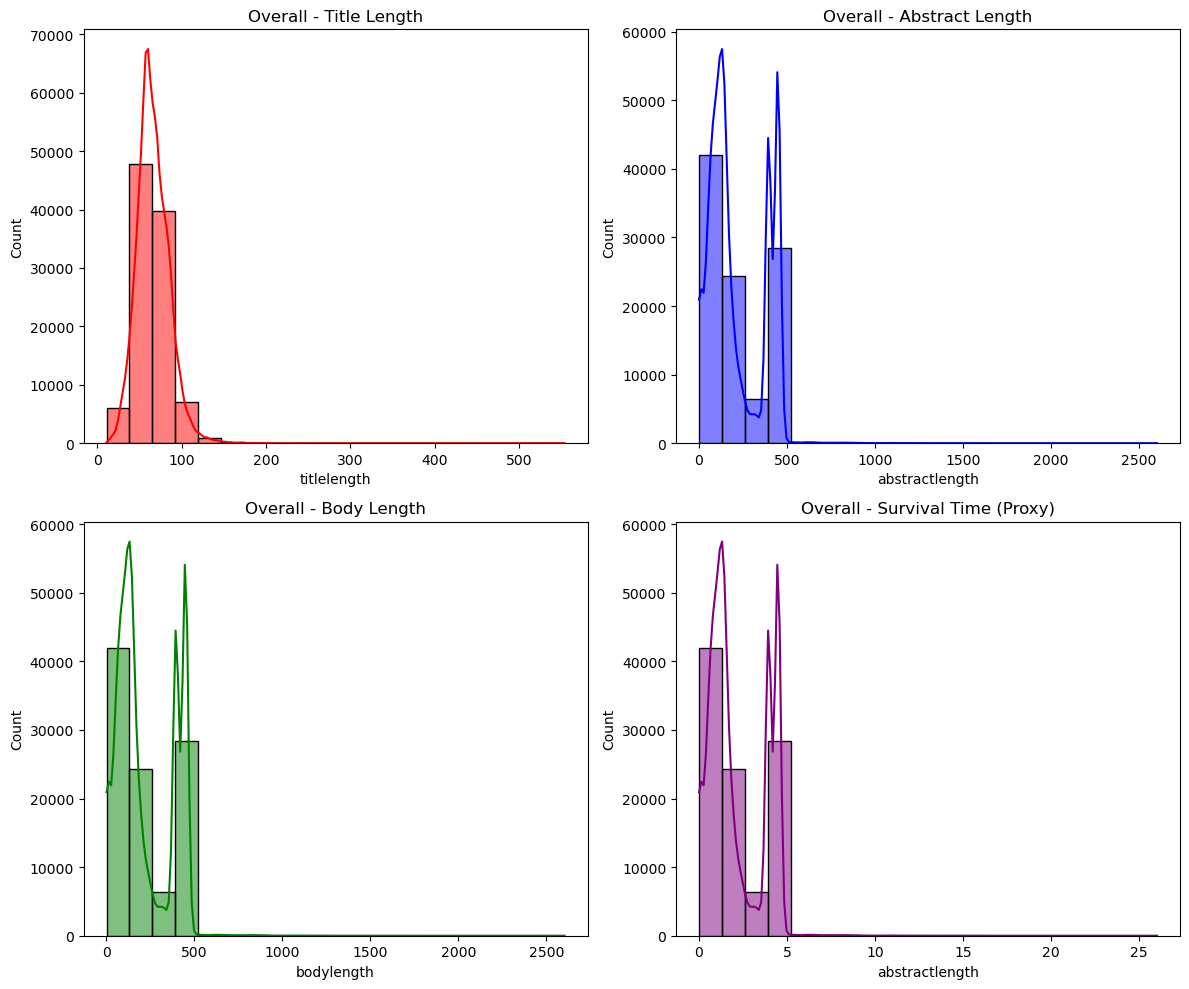

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

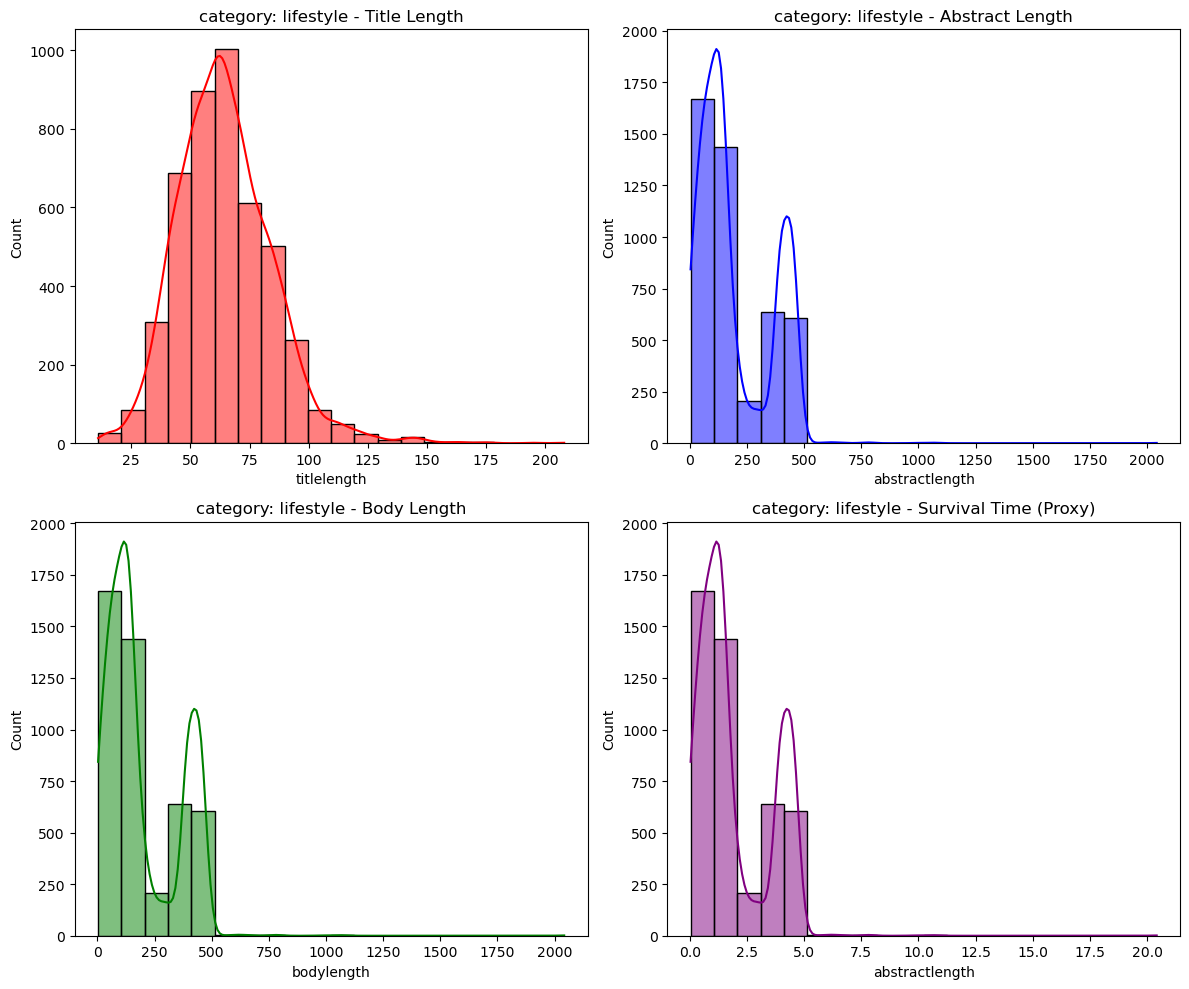

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

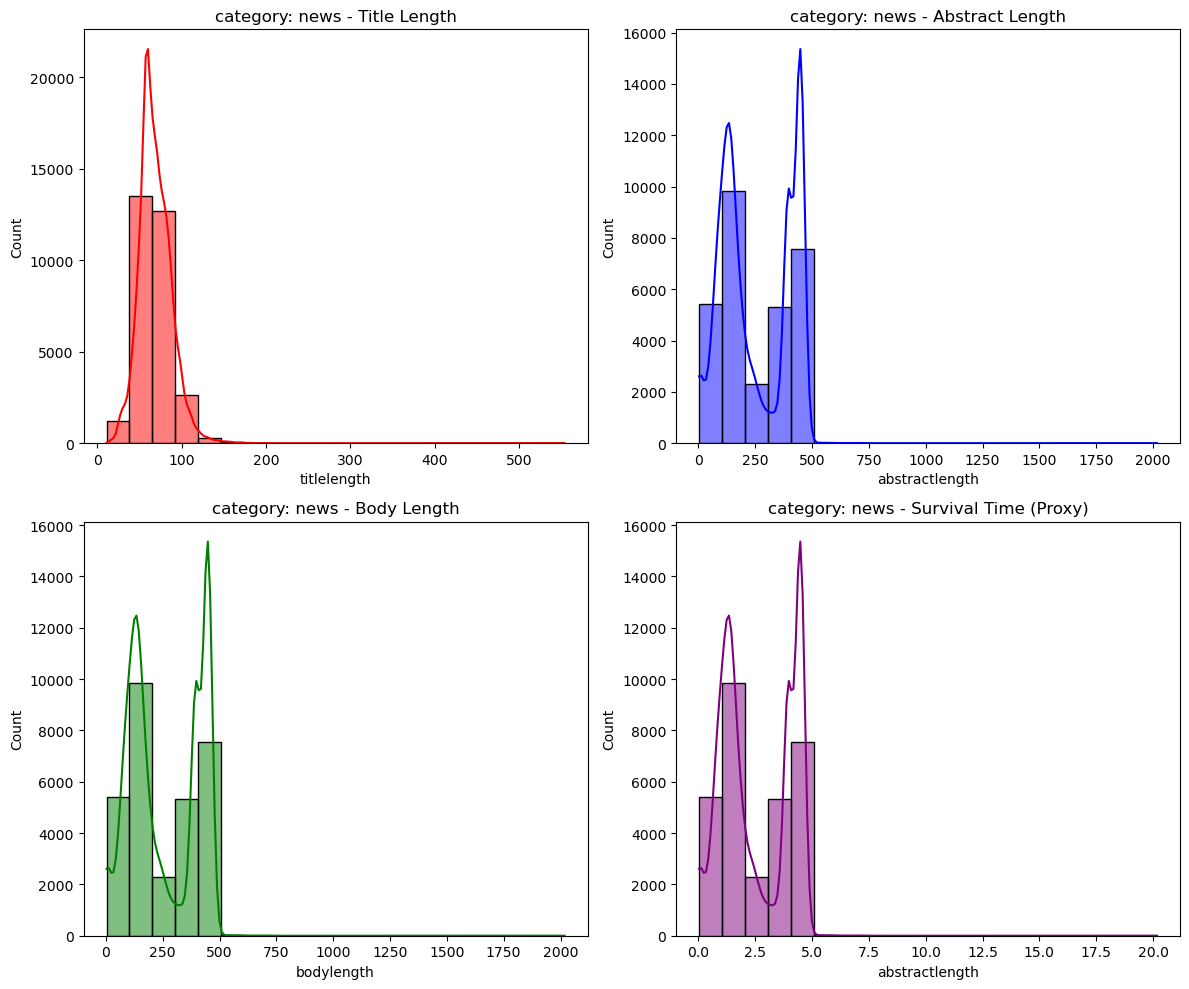

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

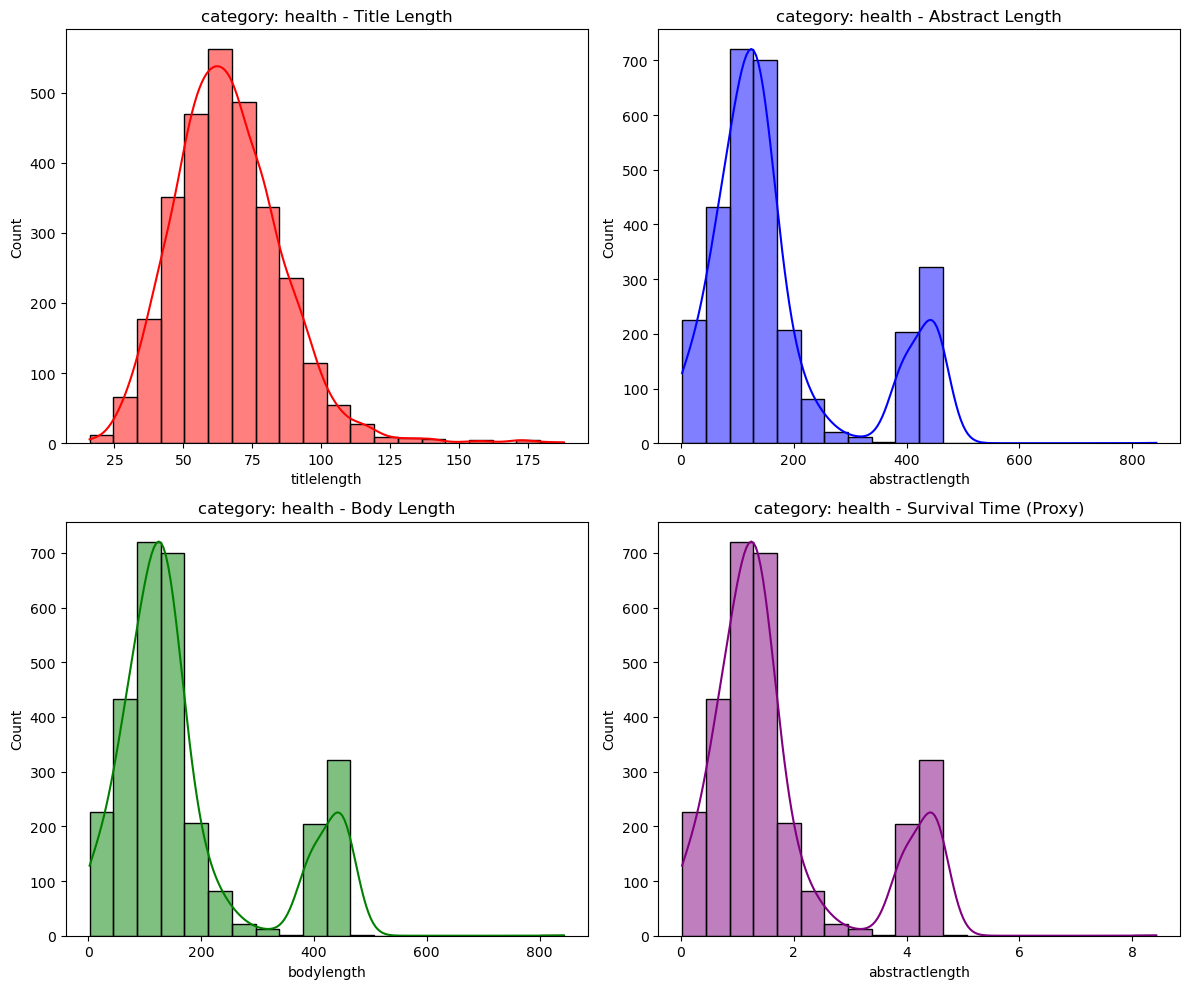

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

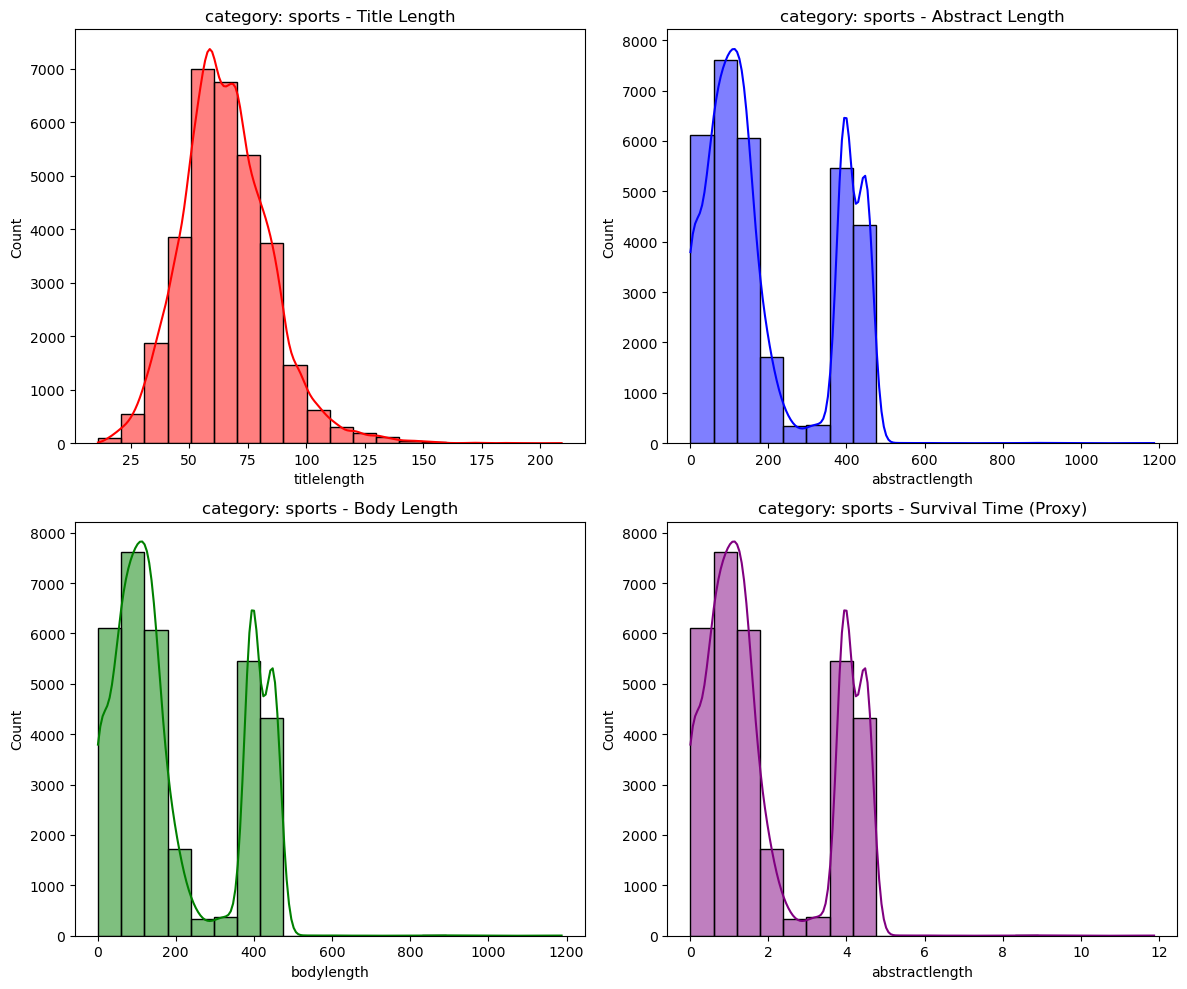

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

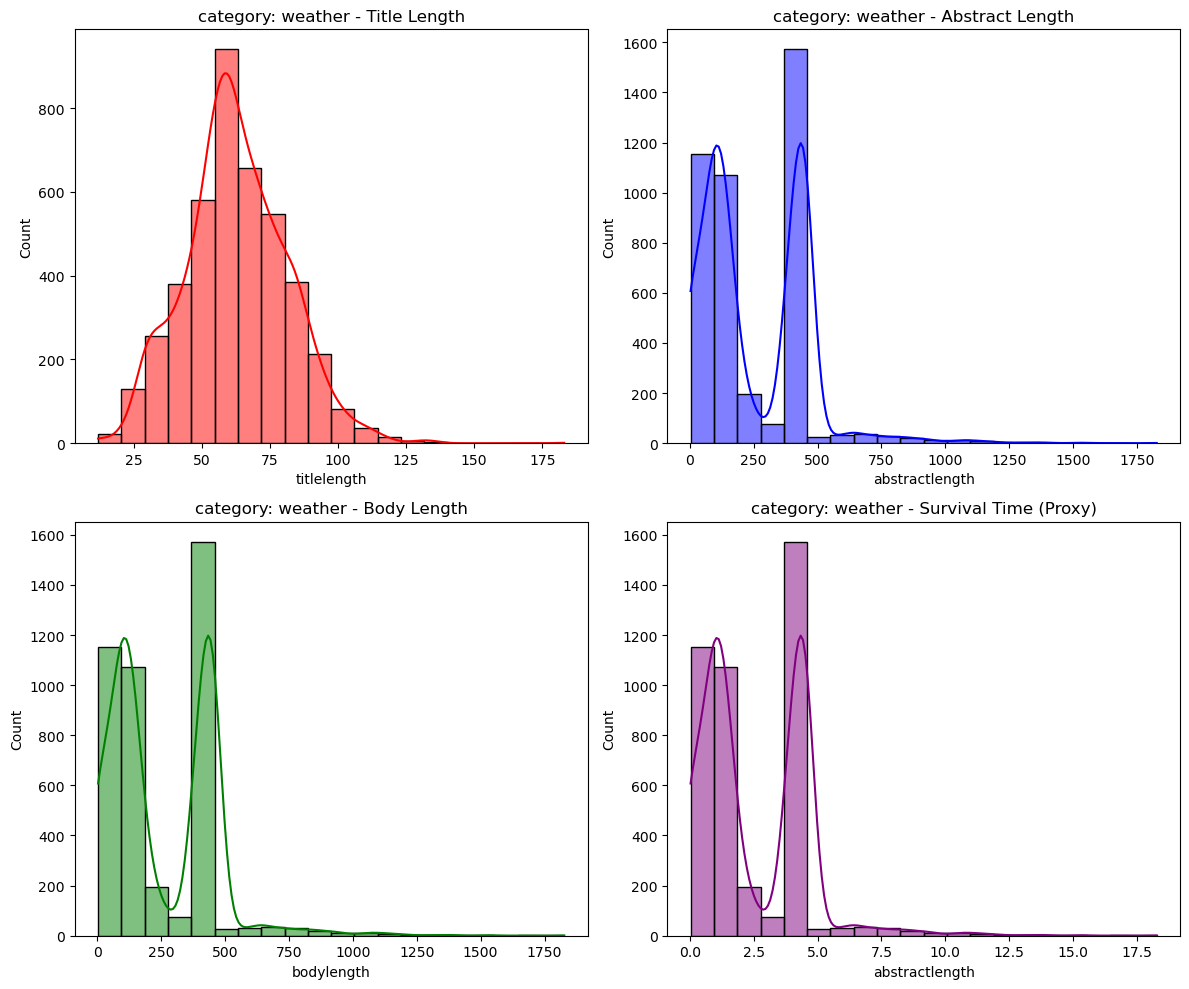

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

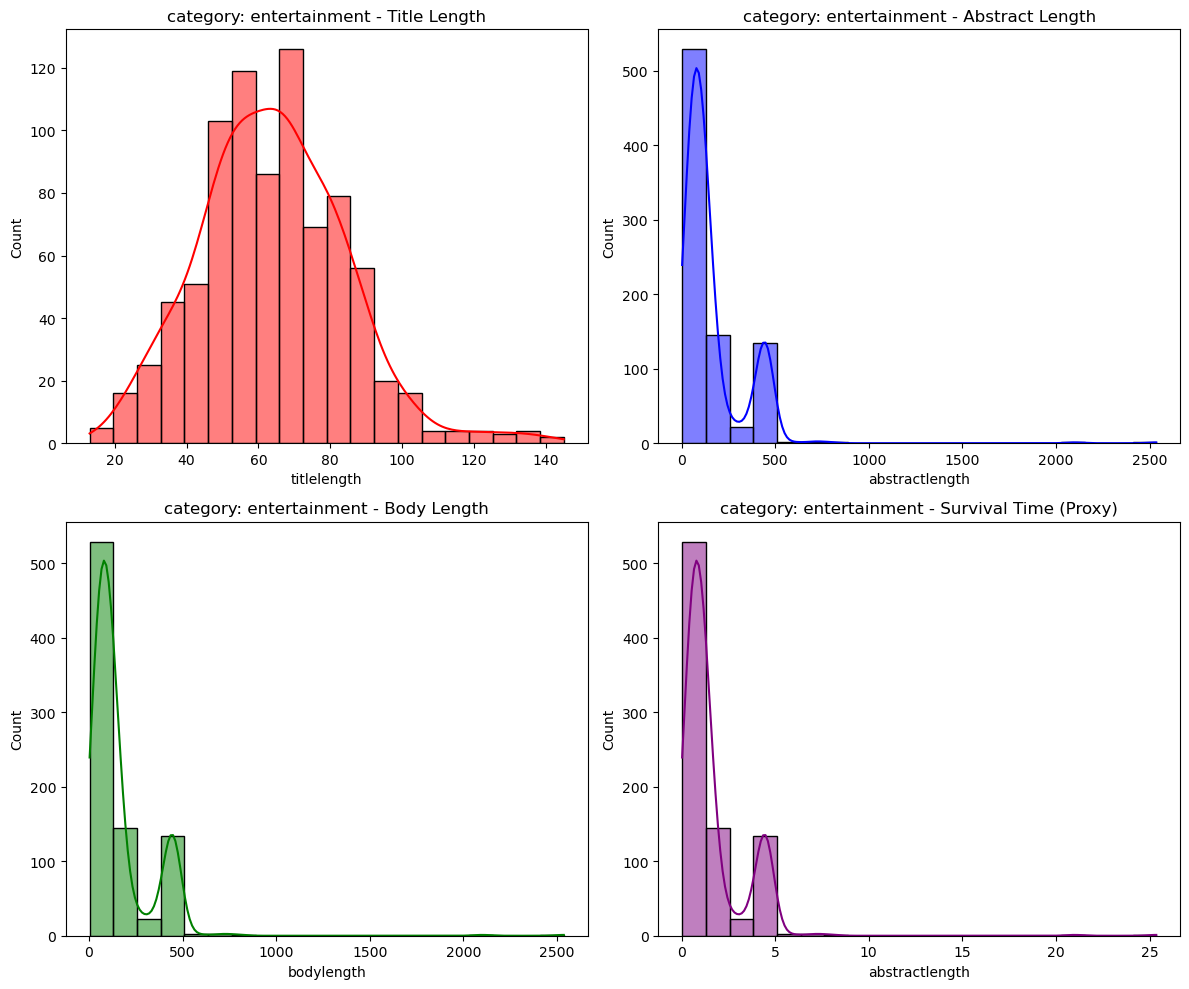

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

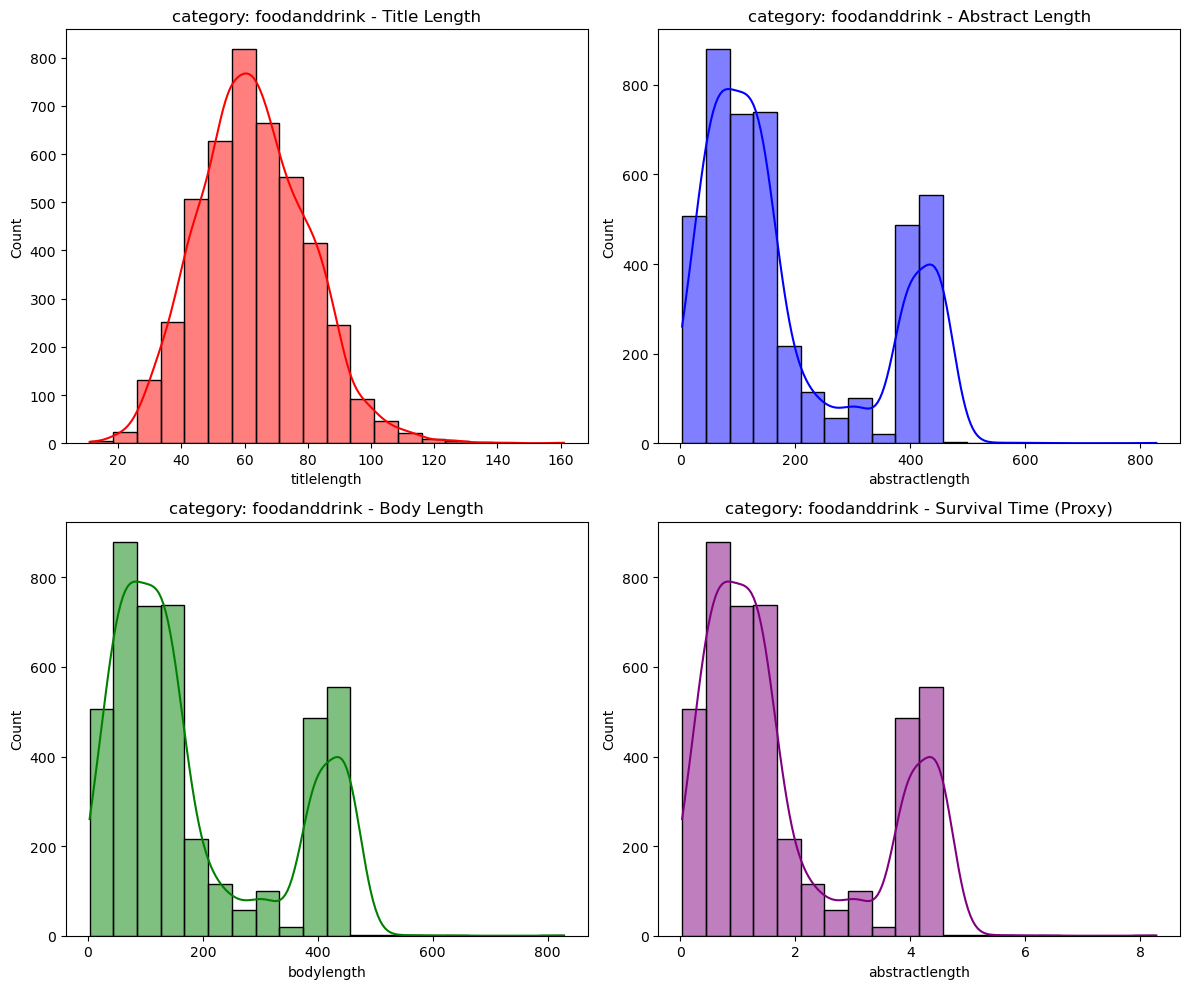

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

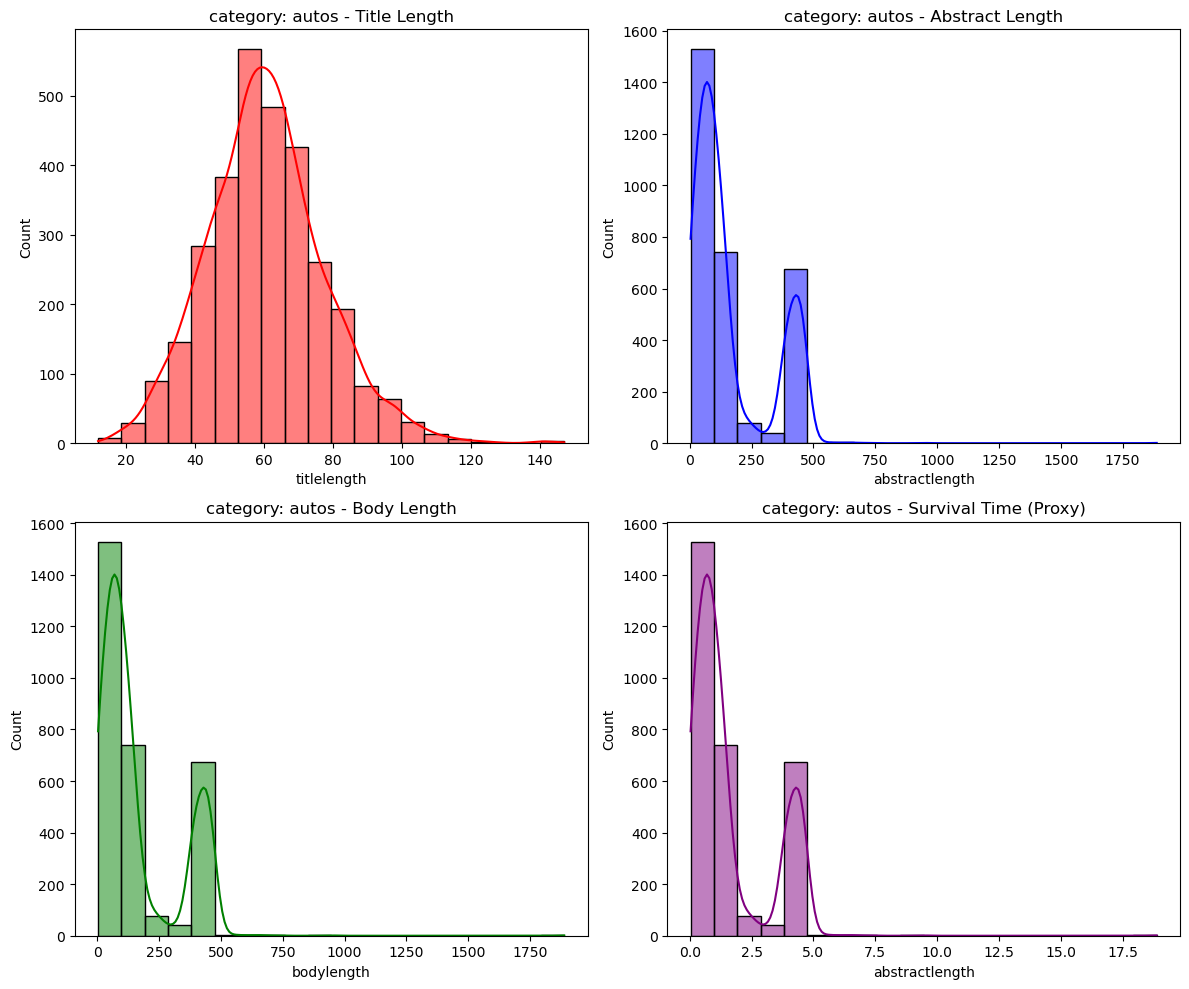

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

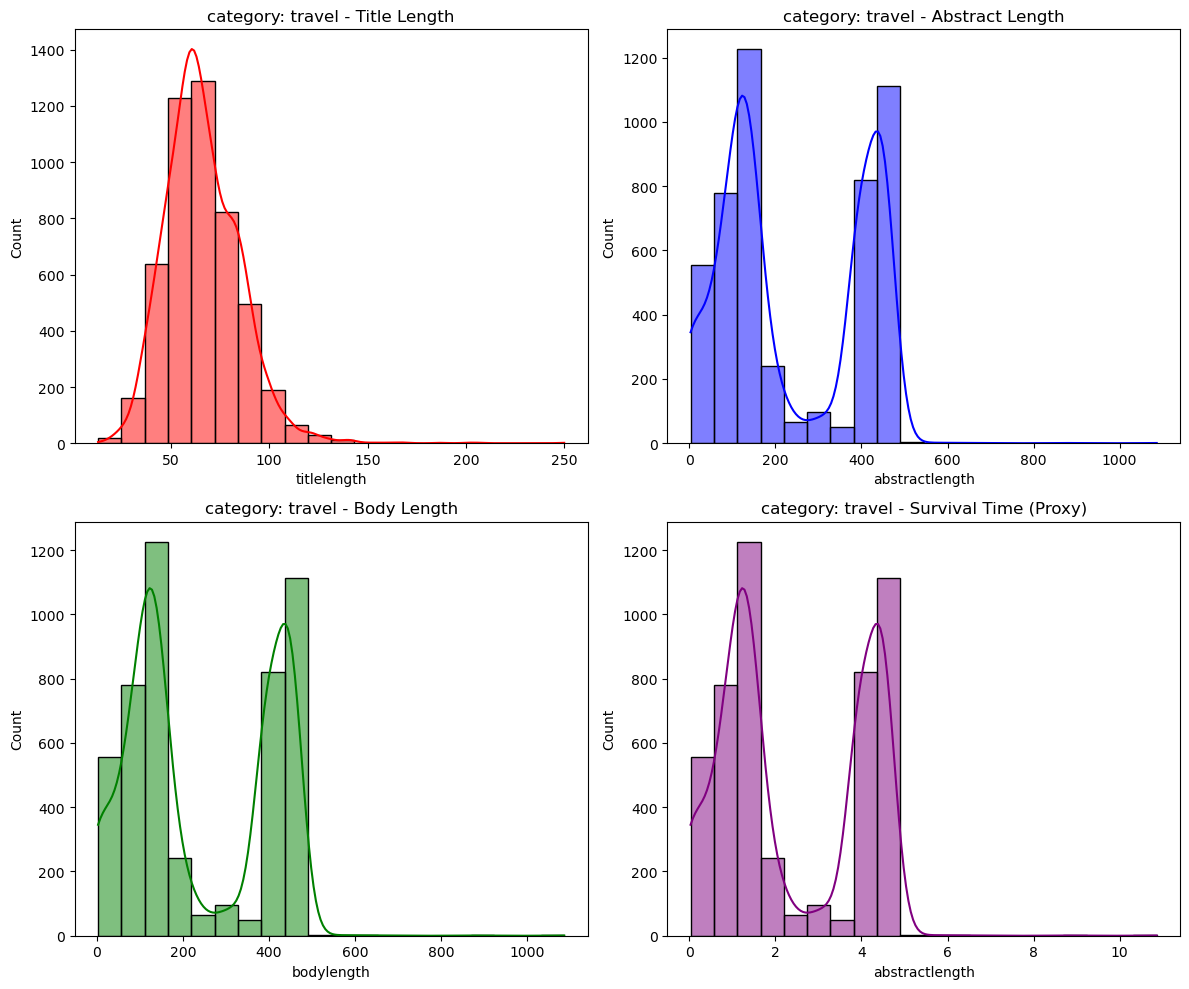

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

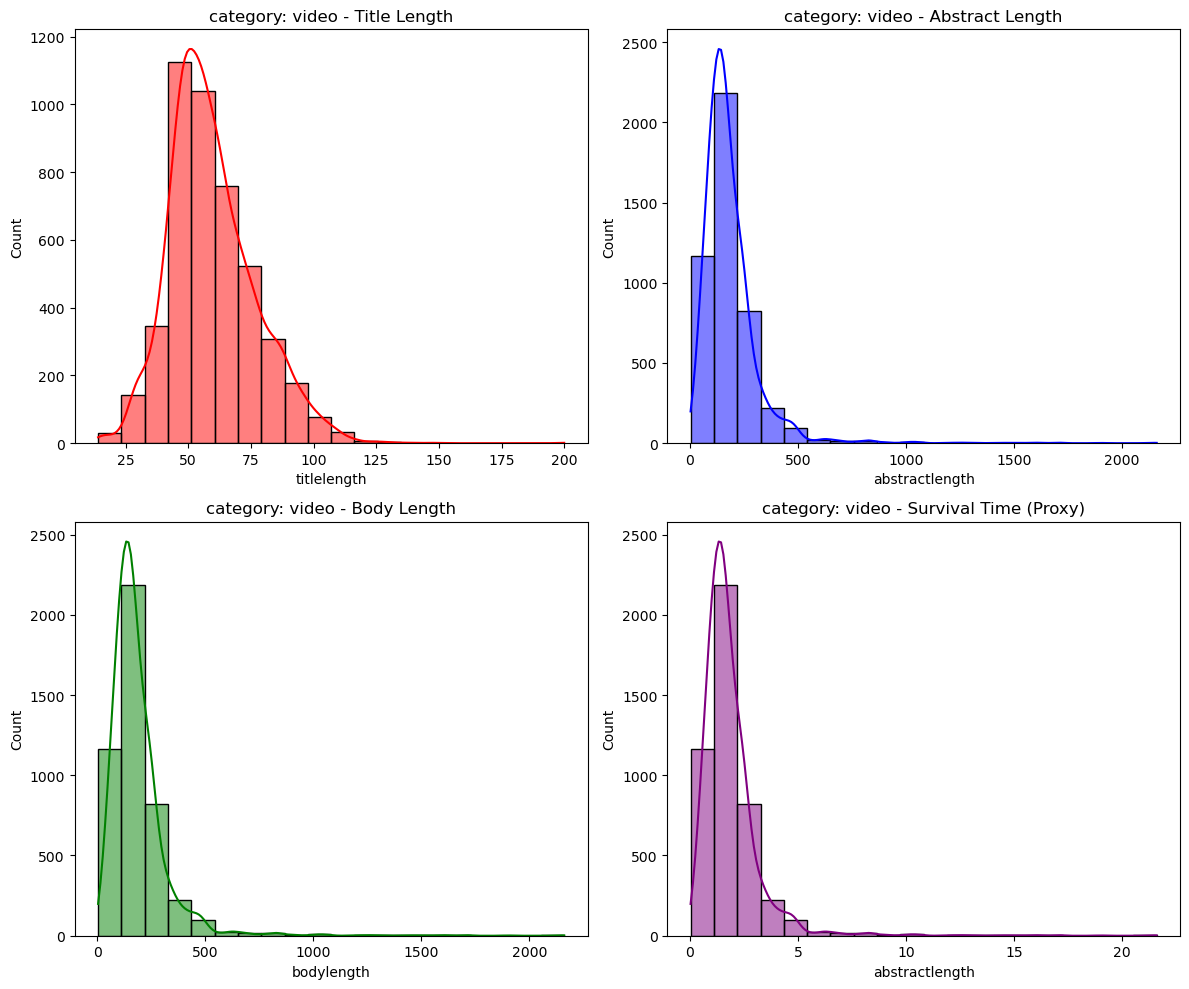

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

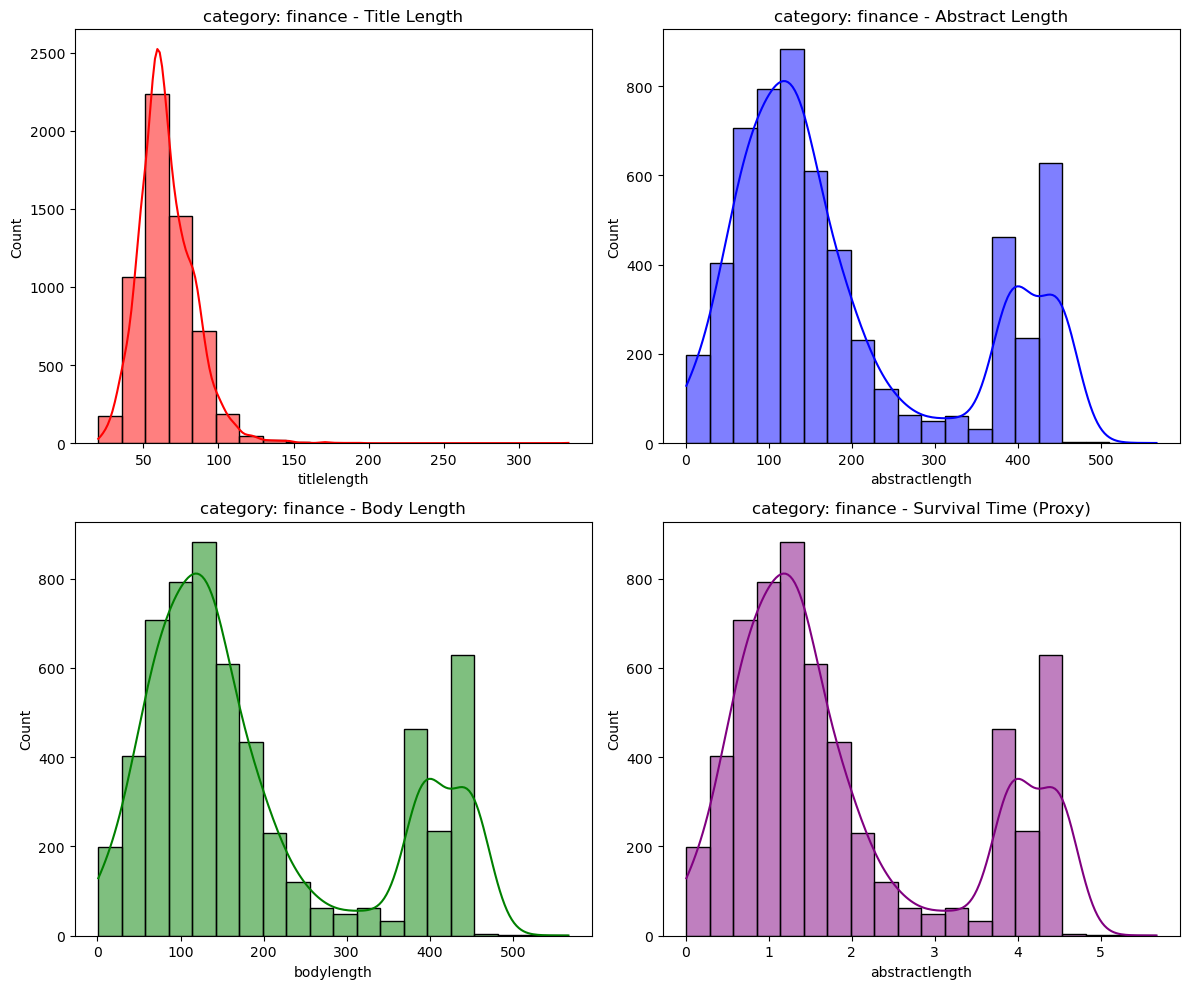

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

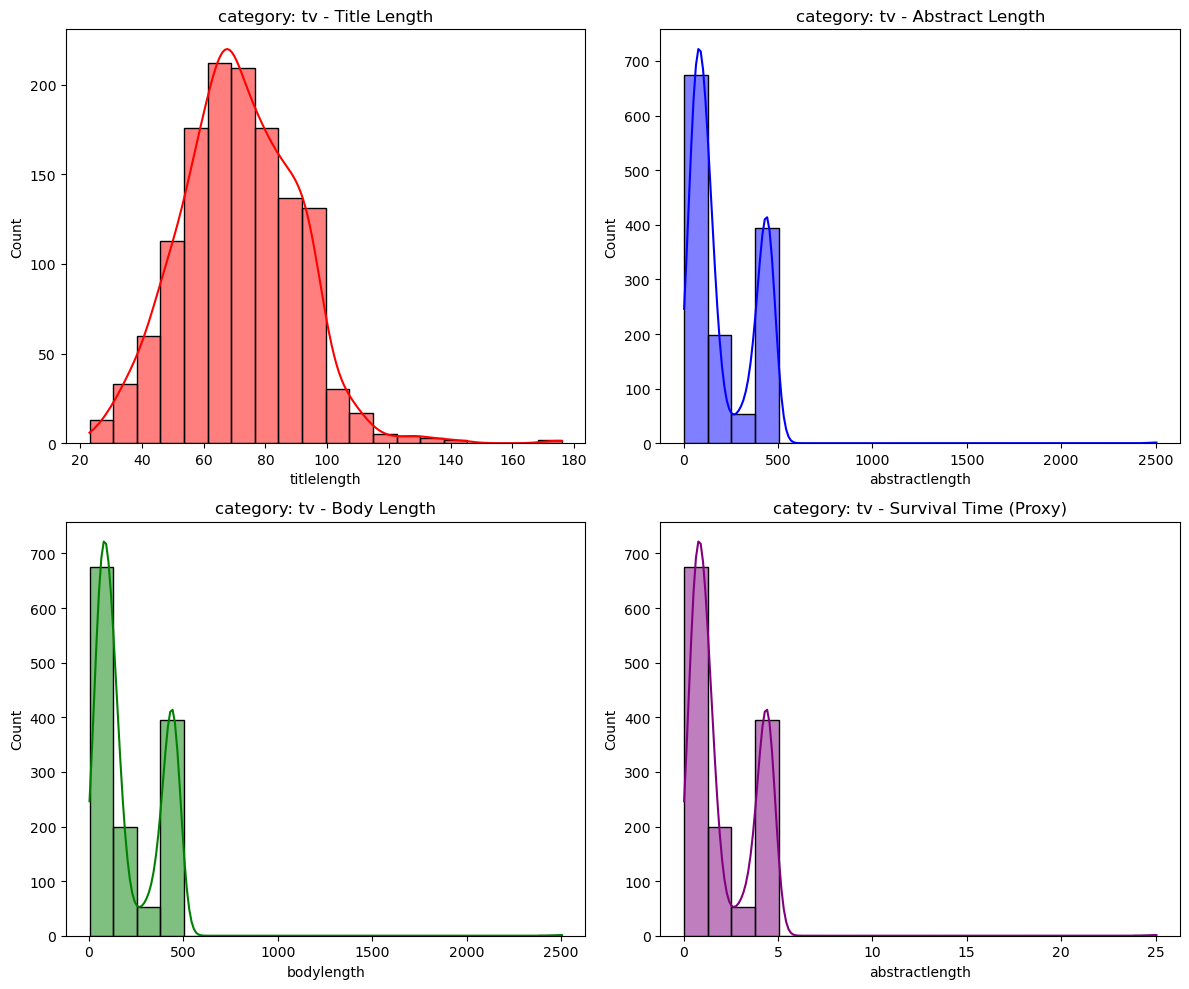

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

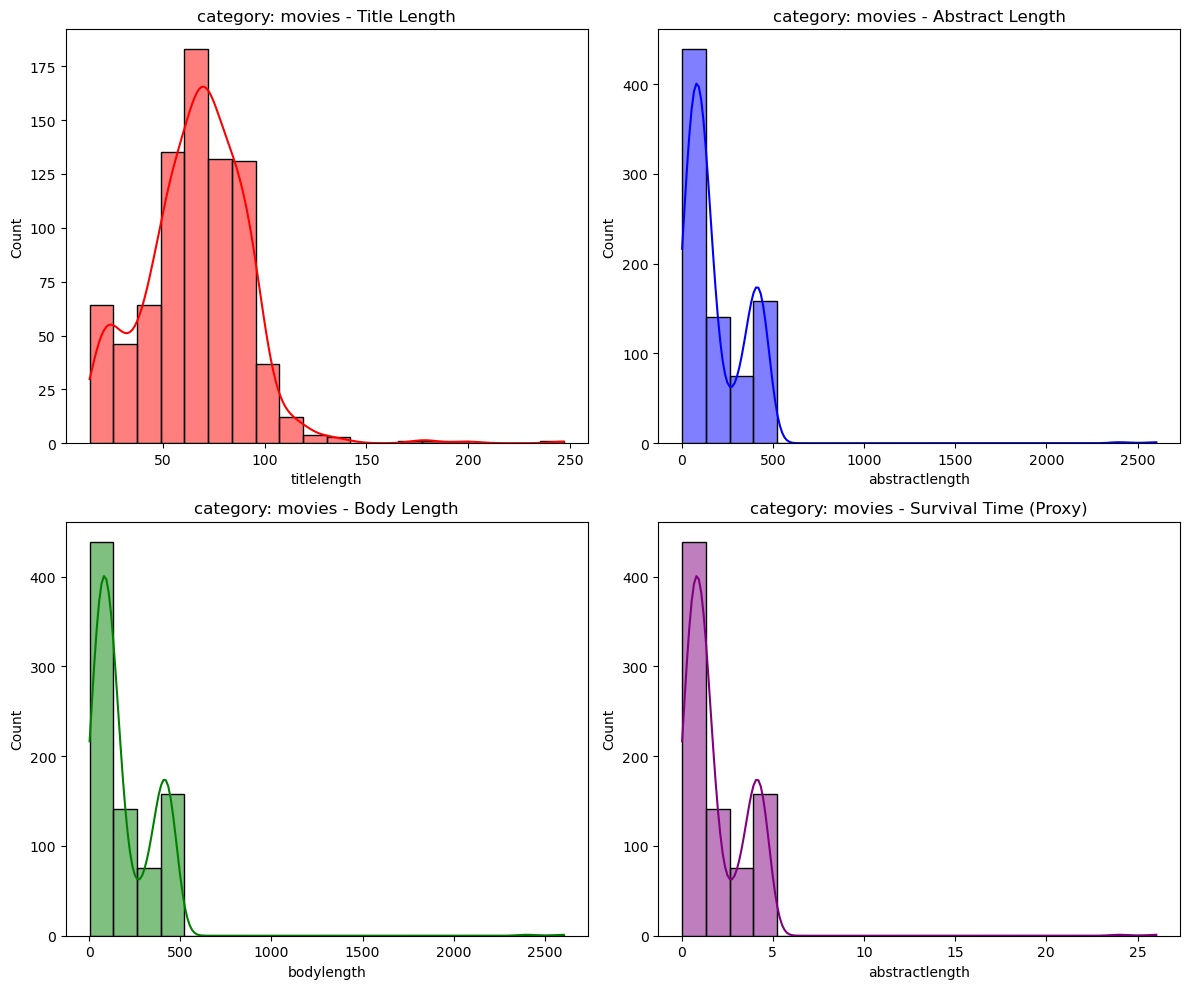

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

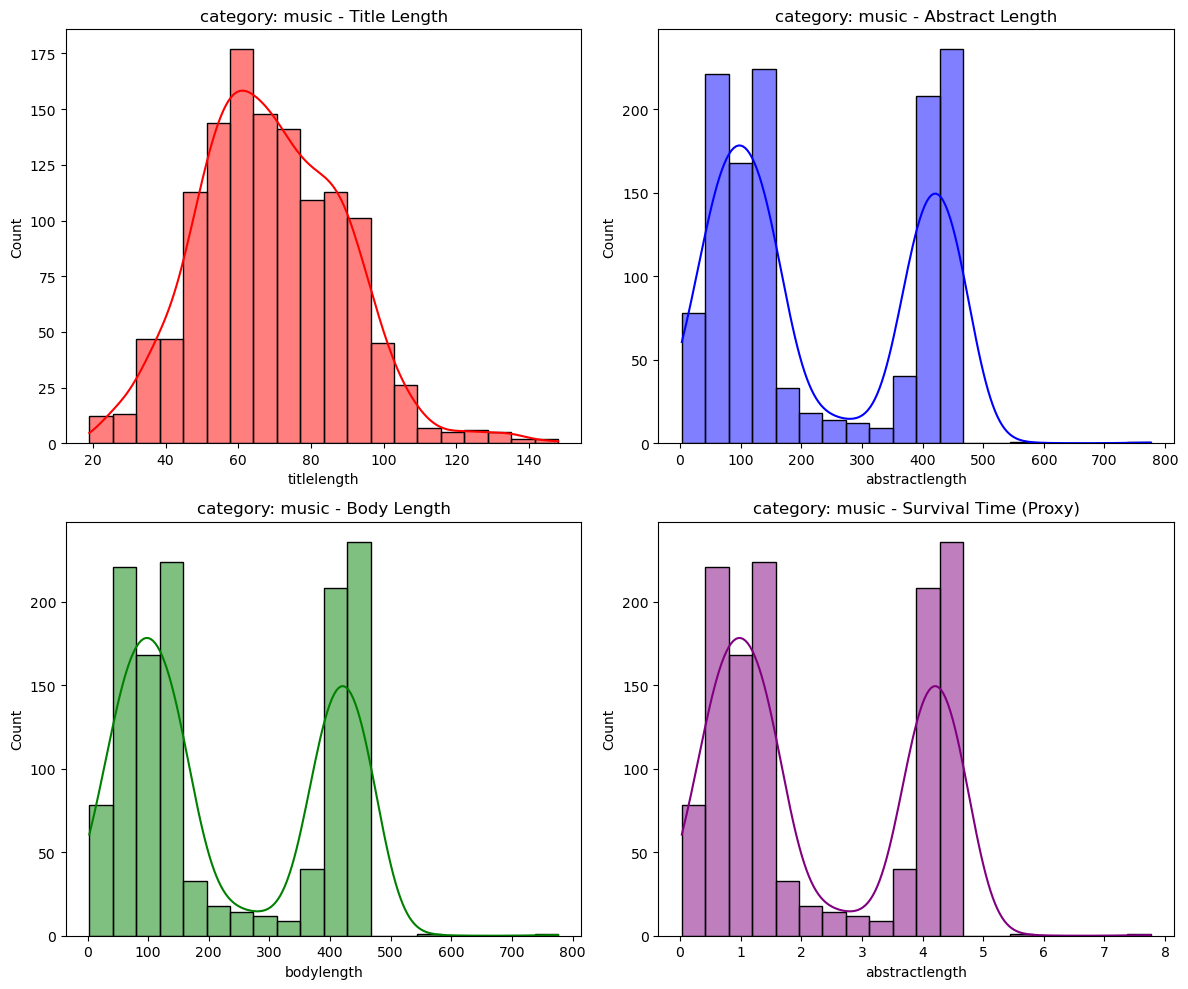

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

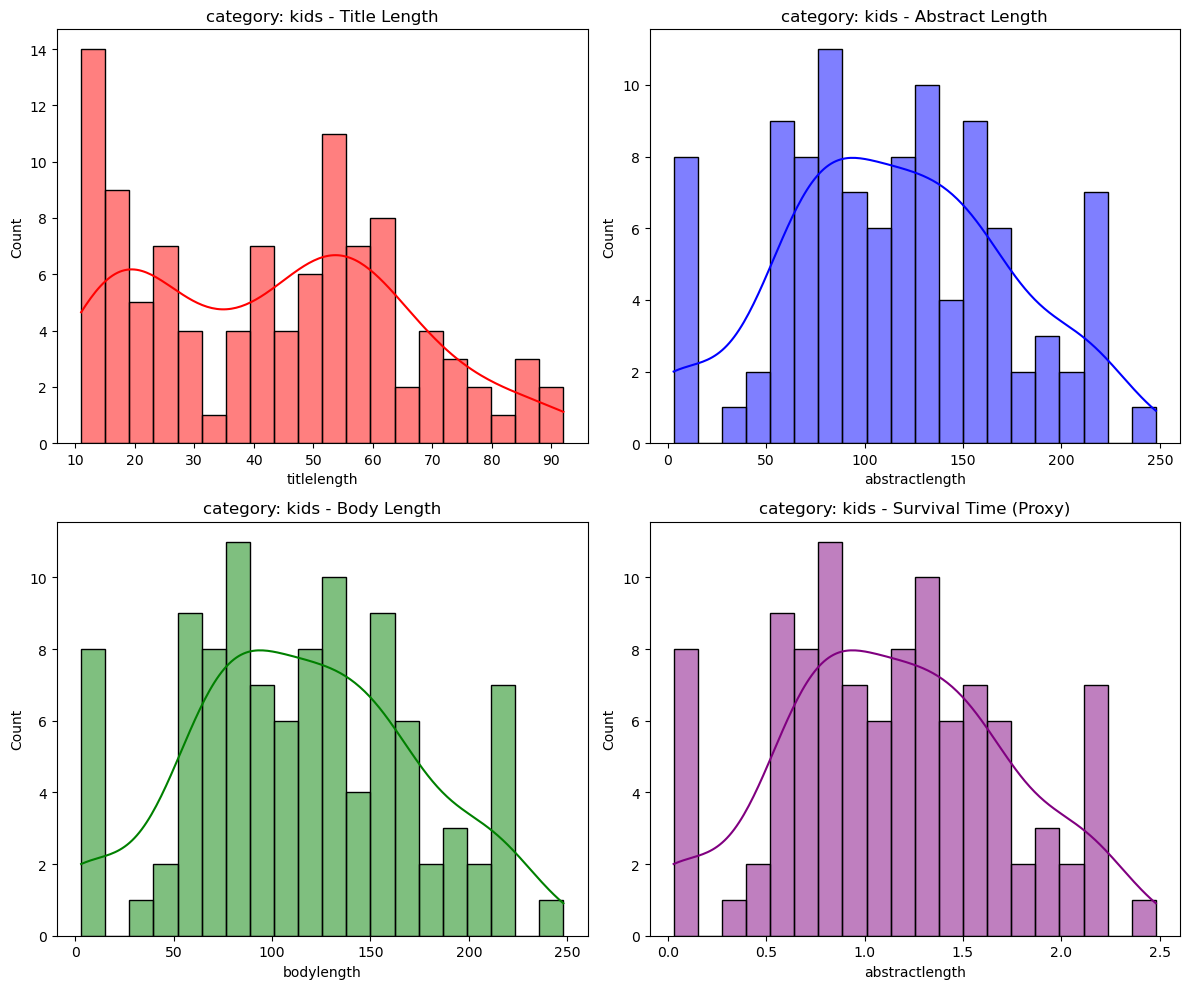

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

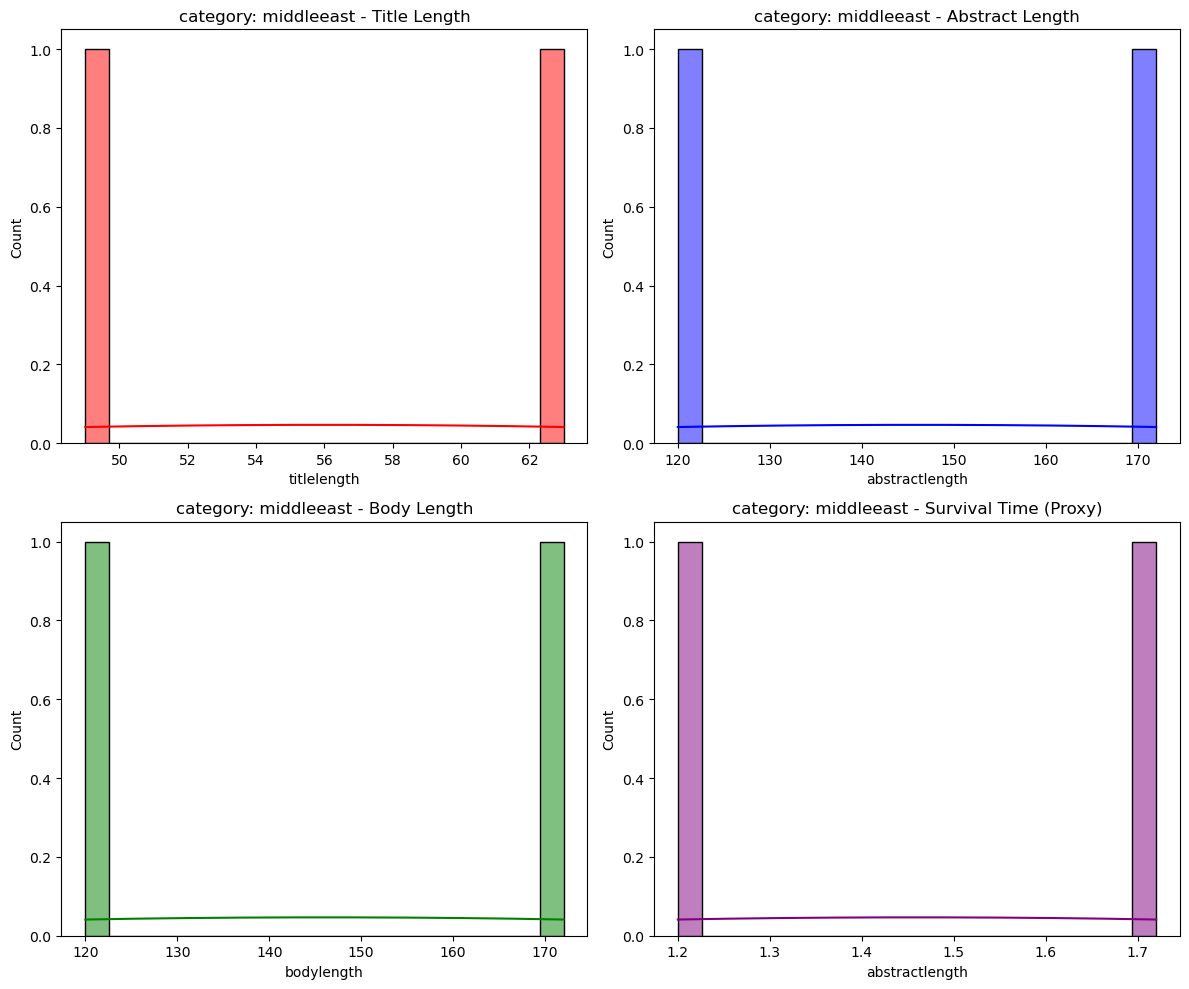

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

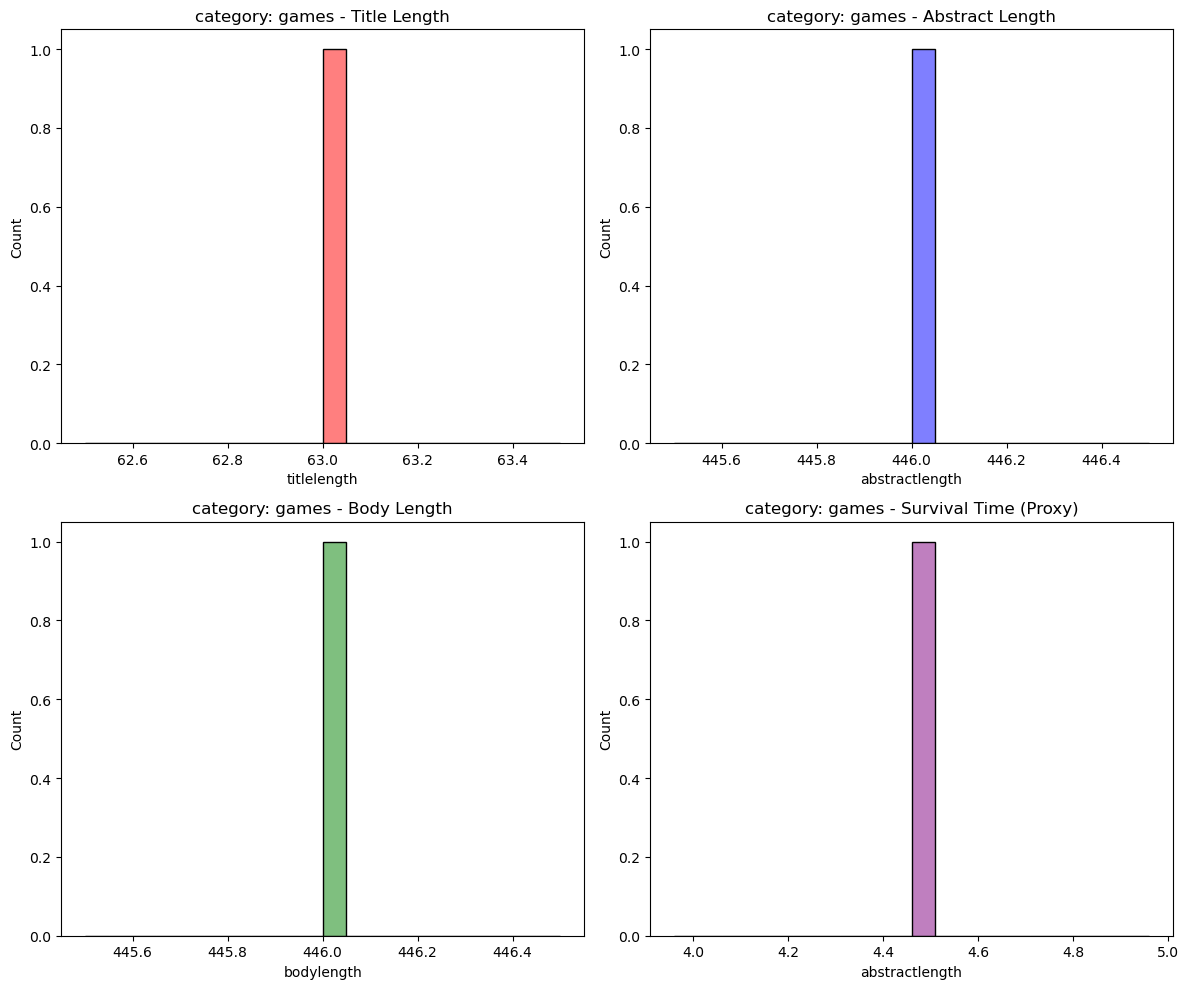

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

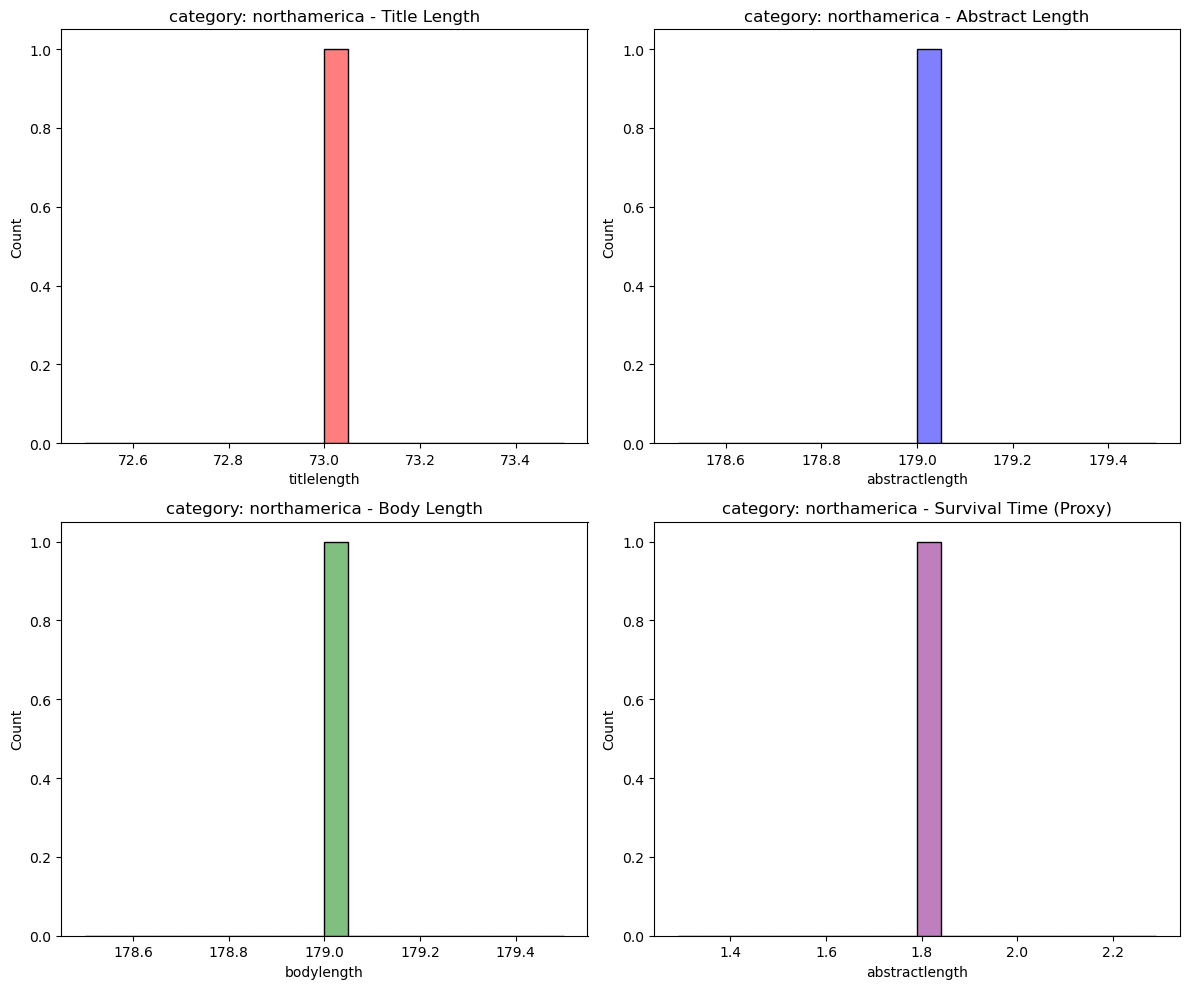

In [53]:
# Compute text lengths
news_graph_2["titlelength"] = news_graph_2["title"].astype(str).apply(len)
news_graph_2["abstractlength"] = news_graph_2["abstract"].astype(str).apply(len)

# If body text is unavailable, we can proxy it with Abstract Length
news_graph_2["bodylength"] = news_graph_2["abstractlength"]  

# Define function to plot distributions
def plot_distributions(df, title_prefix="Overall"):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Title Length Distribution
    sns.histplot(df["titlelength"], bins=20, kde=True, ax=axes[0, 0], color="red")
    axes[0, 0].set_title(f"{title_prefix} - Title Length")

    # Abstract Length Distribution
    sns.histplot(df["abstractlength"], bins=20, kde=True, ax=axes[0, 1], color="blue")
    axes[0, 1].set_title(f"{title_prefix} - Abstract Length")

    # Body Length Distribution (Proxy)
    sns.histplot(df["bodylength"], bins=20, kde=True, ax=axes[1, 0], color="green")
    axes[1, 0].set_title(f"{title_prefix} - Body Length")

    # Survival Time (How long it remains engaging)
    sns.histplot(df["abstractlength"] / 100, bins=20, kde=True, ax=axes[1, 1], color="purple")
    axes[1, 1].set_title(f"{title_prefix} - Survival Time (Proxy)")

    plt.tight_layout()
    plt.show()

# Plot for the entire dataset
plot_distributions(news_graph_2, "Overall")

# Plot for each category
for category in news_graph_2["category"].unique():
    subset_df = news_graph_2[news_graph_2["category"] == category]
    plot_distributions(subset_df, f"category: {category}")

In [54]:
# Convert dictionary to DataFrame
embedding_df = pd.DataFrame.from_dict(entity_embeddings, orient="index")

# Display first few rows
embedding_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Q34433,0.017808,-0.073256,0.102521,-0.059926,-0.060665,0.027027,-0.091728,-0.003057,-0.170798,0.111819,...,-0.077962,0.013433,0.045894,-0.071253,0.086445,-0.120466,0.059235,-0.071865,0.058854,0.024765
Q41,-0.063388,-0.181451,0.057501,-0.091254,-0.076217,-0.052525,0.050500,-0.224871,-0.018145,0.030722,...,-0.051949,0.001861,0.124535,-0.151043,-0.263698,-0.103607,0.020007,-0.101157,-0.091567,0.035234
Q56037,0.021550,-0.044888,-0.027872,-0.128843,0.066651,-0.072159,0.019879,-0.183956,0.080640,0.069166,...,-0.077181,0.091477,0.091388,-0.027993,-0.112258,-0.231887,0.095612,-0.008997,-0.157394,0.088364
Q1860,0.060958,0.069934,0.015832,0.079471,-0.023362,-0.125007,-0.043618,0.134063,-0.121691,0.089166,...,-0.070713,-0.014287,0.013578,0.099977,0.012199,-0.141138,0.056129,-0.133727,0.025795,0.051448
Q7737,-0.021237,0.176011,-0.078886,0.041470,0.136488,-0.063177,-0.013134,-0.048977,-0.072779,0.062055,...,-0.136706,-0.162670,-0.101399,0.039757,0.123693,-0.129503,0.153088,-0.014275,-0.113625,-0.097839


In [56]:
print("Number of entities:", len(entity_embeddings))
print("Embedding vector size:", len(next(iter(entity_embeddings.values()))))

Number of entities: 42007
Embedding vector size: 100


In [57]:
def cosine_similarity(vec1, vec2):
    return np.dot(vec1, vec2) / (norm(vec1) * norm(vec2))

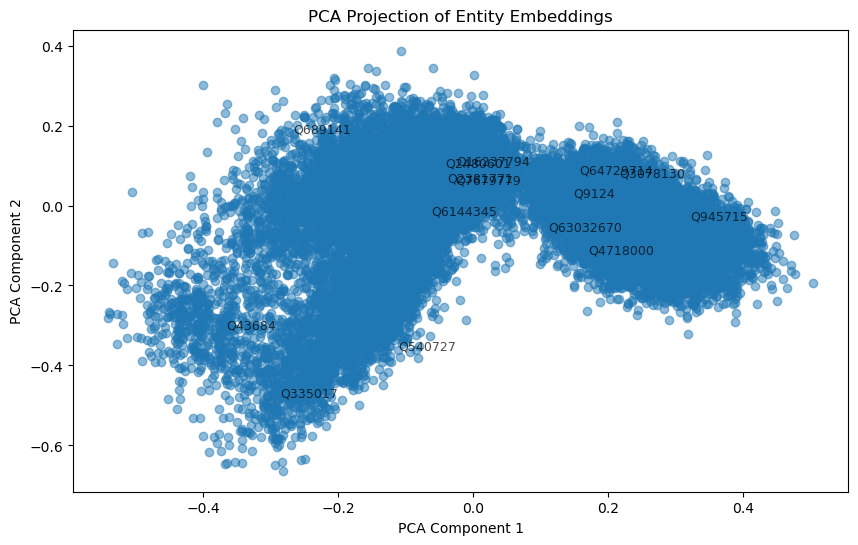

In [66]:
def visualize_embeddings(embedding_df, num_labels=10):
    """
    Visualizes entity embeddings using PCA for dimensionality reduction.

    Parameters:
    - embedding_df (pd.DataFrame): DataFrame of entity embeddings.
    - num_labels (int): Number of entities to annotate in the graph.
    """
    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embedding_df)

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)

    # Randomly select points to annotate
    random_indices = random.sample(range(len(embedding_df)), min(num_labels, len(embedding_df)))
    for i in random_indices:
        entity = embedding_df.index[i]
        plt.annotate(entity, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, alpha=0.7)

    # Plot title and labels
    plt.title("PCA Projection of Entity Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Call function to visualize
visualize_embeddings(embedding_df, num_labels=15)  # Adjust num_labels if needed

In [63]:
# Convert dictionary to DataFrame
relation_embedding_df = pd.DataFrame.from_dict(relation_embeddings, orient="index")

# Display first few rows
relation_embedding_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
P31,-0.073467,-0.132227,0.034173,-0.032769,0.008289,-0.107088,-0.031712,-0.039581,0.101882,-0.106961,...,-0.045641,-0.050068,-0.053686,-0.045389,-0.037017,0.117190,-0.063597,-0.056910,0.058387,-0.114056
P21,-0.078436,0.108589,-0.049429,-0.131355,0.049300,-0.094605,-0.101469,0.127802,-0.081245,0.113759,...,-0.151203,0.074341,-0.030571,-0.137183,0.045598,-0.151155,-0.066223,0.057489,0.130188,-0.054801
P106,-0.052137,0.052444,-0.019886,-0.152309,0.014144,-0.180491,-0.132198,0.063082,0.085229,0.114965,...,-0.088902,-0.058958,-0.032021,-0.147213,0.082776,-0.169705,0.122445,-0.054737,0.055321,0.070961
P735,-0.051398,0.056219,0.068029,-0.137717,-0.030050,0.061566,-0.103184,-0.074124,-0.118975,0.122100,...,-0.096461,-0.092234,0.056870,0.013640,0.042696,0.013683,-0.021127,-0.189257,0.055315,0.101863
P108,0.091231,0.022526,0.059349,-0.141853,0.035025,-0.111040,-0.127337,0.047645,-0.172328,0.090933,...,0.026855,-0.046994,-0.056248,-0.146538,0.121375,-0.211757,0.077591,-0.002200,-0.053880,0.140873


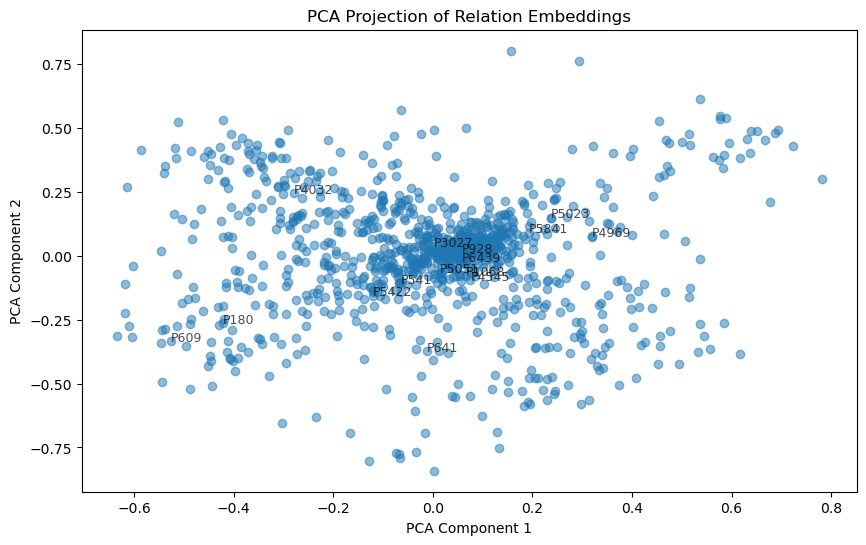

In [67]:
def visualize_embeddings_relation(embedding_df, num_labels=10):
    """
    Visualizes entity embeddings using PCA for dimensionality reduction.

    Parameters:
    - embedding_df (pd.DataFrame): DataFrame of entity embeddings.
    - num_labels (int): Number of entities to annotate in the graph.
    """
    # Reduce to 2D using PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embedding_df)

    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], alpha=0.5)

    # Randomly select points to annotate
    random_indices = random.sample(range(len(embedding_df)), min(num_labels, len(embedding_df)))
    for i in random_indices:
        entity = embedding_df.index[i]
        plt.annotate(entity, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), fontsize=9, alpha=0.7)

    # Plot title and labels
    plt.title("PCA Projection of Relation Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

# Call function to visualize
visualize_embeddings_relation(relation_embedding_df, num_labels=15)  # Adjust num_labels if needed

### Understanding News Articles

#### Categories & Subcategories

In [33]:
# Count occurrences of each category
category_counts = news_graph["category"].value_counts().reset_index()
category_counts.columns = ["category", "count"]

# Plot
fig = px.bar(category_counts, x="category", y="count", title="Most Common News Categories")

# Customize labels
fig.update_layout(xaxis_title="Category", yaxis_title="Count")

# Show plot
fig.show()

In [ ]:
# Compute value counts efficiently
distribution = news_graph.value_counts(['category', 'subcategory']).reset_index()
distribution.columns = ['category', 'subcategory', 'values']

# Treemap Visualization
fig = px.treemap(distribution, 
                 path=['category', 'subcategory'], 
                 values='values', 
                 color='category',
                 title="Treemap of Categories and Subcategories")
fig.show()

In [ ]:
# top 5 most popular subcategories for each of the top 5 categories
top_categories = news_graph['category'].value_counts().nlargest(5).index

# Generate count plots for subcategories within each top category
for category in top_categories:
    subcategory_counts = news_graph[news_graph['category'] == category]['subcategory'].value_counts().nlargest(10)
    fig = px.bar(subcategory_counts, x=subcategory_counts.index, y=subcategory_counts.values,
                 labels={'x': 'subcategory', 'y': 'Count'}, title=f"Subcategories for {category}")
    fig.update_xaxes(tickangle=50)
    fig.show()

In [ ]:
# Function to get top words per category
def get_top_words(df, column='title', top_n=5):
    category_words = (
        df.groupby('category')[column]
        .apply(lambda titles: Counter(
            word.strip(' "\'') 
            for title in titles 
            for word in title.split() 
            if word.lower() not in stop_words and word != '-'
        ).most_common(top_n))
    )
    
    # Display results
    for category, words in category_words.items():
        print(f"{category}: {', '.join(f'{word} ({count})' for word, count in words)}\n")

# Call the function
get_top_words(news_graph)

In [37]:
# Tokenize words while filtering out stopwords
words = Counter(
    word for word in " ".join(news_graph["title"]).lower().split() 
    if word not in stop_words and word.isalpha()  # Ensures only alphabetic words are considered
)

# Print the 20 most common words
print(words.most_common(20))

[('new', 4832), ('week', 2733), ('man', 2554), ('trump', 2534), ('says', 2476), ('game', 2171), ('state', 2161), ('police', 2135), ('school', 2085), ('first', 1822), ('county', 1804), ('best', 1733), ('football', 1723), ('top', 1695), ('get', 1677), ('fire', 1659), ('win', 1615), ('home', 1486), ('crash', 1428), ('city', 1409)]


In [ ]:
# Function to get top bigrams per category
def get_top_bigrams(df, column='title', top_n=5):
    category_bigrams = (
        df.groupby('category')[column]
        .apply(lambda titles: Counter(
            [" ".join(pair) for title in titles 
             for pair in zip(title.lower().split()[:-1], title.lower().split()[1:]) 
             if pair[0] not in stop_words and pair[1] not in stop_words]  # Filter stopwords in bigrams
        ).most_common(top_n))
    )

    # Display results
    for category, bigrams in category_bigrams.items():
        print(f"{category}: {', '.join(f'{bigram} ({count})' for bigram, count in bigrams)}\n")

# Call the function
get_top_bigrams(news_graph)

#### News Titles

In [40]:
# most popular titles per category
news_graph.groupby('category')['title'].value_counts().nlargest(10)

category   title                                                          
lifestyle  Powerball Winning Numbers For 10/26/2019 Drawing: $130M Jackpot    24
           Look of the Day                                                    18
video      Evening news briefing from CNN                                     18
news       Photos of the Day                                                  16
video      Morning news briefing from CNN                                     16
sports     Friday's Scores                                                    15
lifestyle  Powerball Winning Numbers For 10/30/2019 Drawing: $140M Jackpot    12
video      CNN Business Now                                                    9
weather    Today's weather in St. Louis                                        9
           Your weather today in St. Louis                                     9
Name: count, dtype: int64

In [ ]:
# Ensure all values are treated as strings before splitting
news_graph["title_length"] = news_graph["title"].astype(str).apply(lambda x: len(x.split()) if x.strip() else 0)

# Plot distribution
fig = px.histogram(news_graph, x="title_length", nbins=20, title="Distribution of News Title Length")
fig.show()

In [ ]:
# Plot distribution of title length by subcategory
fig = px.box(news_graph, x="subcategory", y="title_length",
             title="Title Length Distribution by Subcategory",
             labels={"subcategory": "Subcategory", "title_length": "Title Length"})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [43]:
# Function to compute text statistics efficiently
def compute_title_stats(df, text_col="title"):
    df = df.copy()  # Avoid modifying original dataframe

    df["title_polarity"] = df[text_col].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    df["title_word_count"] = df[text_col].astype(str).apply(lambda x: len(x.split()))
    df["title_unique_word_count"] = df[text_col].astype(str).apply(lambda x: len(set(x.split())))
    df["title_stop_word_count"] = df[text_col].astype(str).apply(lambda x: sum(1 for w in x.lower().split() if w in stop_words))
    df["title_mean_word_length"] = df[text_col].astype(str).apply(lambda x: np.mean([len(w) for w in x.split()]) if x.split() else 0)
    df["title_char_count"] = df[text_col].astype(str).apply(len)
    df["title_punctuation_count"] = df[text_col].astype(str).apply(lambda x: sum(1 for c in x if c in string.punctuation))

    return df

# Apply function to compute title statistics
df_word_count = compute_title_stats(news_graph)

In [ ]:
# Histograms for Text Statistics
columns = ['title_polarity', 'title_word_count', 'title_unique_word_count', 
           'title_stop_word_count', 'title_mean_word_length', 'title_char_count', 'title_punctuation_count']

# Create subplots dynamically
fig = make_subplots(rows=len(columns), cols=1, subplot_titles=columns)

# Add histograms
for i, col in enumerate(columns, start=1):
    fig.add_trace(go.Histogram(x=df_word_count[col], nbinsx=50, name=col), row=i, col=1)

fig.update_layout(title="Distribution of Title Features", height=1800, width=900, showlegend=False)
fig.show()

In [ ]:
# Average Word Count per Category
df_category_word_count = df_word_count.groupby("category")["title_word_count"].mean().reset_index().sort_values(by="title_word_count", ascending=False)

fig = px.bar(df_category_word_count, x="category", y="title_word_count", title="Average Title Word Count per Category", labels={"title_word_count": "Avg Word Count"})
fig.show()

In [ ]:
# Average Polarity per Category
df_category_polarity = df_word_count.groupby("category")["title_polarity"].mean().reset_index().sort_values(by="title_polarity", ascending=False)

fig = px.bar(df_category_polarity, x="category", y="title_polarity", title="Average Title Polarity per Category", labels={"title_polarity": "Avg Sentiment Polarity"})
fig.show()

In [ ]:
# Combine all titles into one text
all_titles = " ".join(news_graph["title"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(all_titles)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in News Titles")
plt.show()

In [ ]:
# Define categories to visualize
categories = ['sports', 'news', 'finance', 'travel', 'lifestyle']

# Set up a subplot layout
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(20, 5))

# Generate and plot word clouds for each category
for ax, category in zip(axes, categories):
    text = " ".join(news_graph[news_graph['category'] == category]['title'])
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(text)

    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"{category.capitalize()} Category", fontsize=14)
    ax.axis("off")  # Hide axes

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

#### Abstracts

In [ ]:
# Ensure all values are treated as strings before splitting
news_graph["abstract_length"] = news_graph["abstract"].astype(str).apply(lambda x: len(x.split()) if x.strip() else 0)

fig = px.histogram(news_graph, x="abstract_length", nbins=20, title="Distribution of News Abstract Length")
fig.show()

In [ ]:
# Compute average abstract length
avg_abstract_length = news_graph.groupby("category")["abstract_length"].mean().reset_index()

# Round values for better readability
avg_abstract_length["abstract_length"] = avg_abstract_length["abstract_length"].round(1)

# Sort categories by abstract length (descending order)
avg_abstract_length = avg_abstract_length.sort_values(by="abstract_length", ascending=False)

# Plot
fig = px.bar(avg_abstract_length, 
             x="category", 
             y="abstract_length",
             title="Average Abstract Length by Category",
             labels={"category": "Category", "abstract_length": "Avg Abstract Length"},
             text="abstract_length")  # Show values on bars

# **Enhancements**
fig.update_traces(marker_color="royalblue", textposition="outside")  # Set color & move text labels
fig.update_layout(xaxis_tickangle=-45, height=500, width=900)  # Improve layout

# Show plot
fig.show()

In [ ]:
# Plot distribution of Abstract length by subcategory
fig = px.box(news_graph, x="subcategory", y="abstract_length",
             title="Abstract Length Distribution by Subcategory",
             labels={"subcategory": "Subcategory", "abstract_length": "Abstract Length"})

fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [52]:
# most popular titles per category
news_graph.groupby('category')['abstract'].value_counts().nlargest(10)

category   abstract                                                                                                                     
news       What's the weather today? What's the weather for the week? Here's your forecast.                                                 264
weather    What's the weather today? What's the weather for the week? Here's your forecast.                                                 171
movies     Trailer 1                                                                                                                         33
lifestyle  Here are the winning Powerball numbers for the jackpot drawing on Saturday, Oct. 26, 2019.                                        24
news       Here's the most recent top news in Houston; see what headlines are trending among local readers, with links to full articles.     23
sports     Read!                                                                                                                             23

In [53]:
# Function to compute text statistics efficiently
def compute_abstract_stats(df, text_col="abstract"):
    df = df.copy()  # Avoid modifying original dataframe

    df["abstract_polarity"] = df[text_col].astype(str).apply(lambda x: TextBlob(x).sentiment.polarity)
    df["abstract_word_count"] = df[text_col].astype(str).apply(lambda x: len(x.split()))
    df["abstract_unique_word_count"] = df[text_col].astype(str).apply(lambda x: len(set(x.split())))
    df["abstract_stop_word_count"] = df[text_col].astype(str).apply(lambda x: sum(1 for w in x.lower().split() if w in stop_words))
    df["abstract_mean_word_length"] = df[text_col].astype(str).apply(lambda x: np.mean([len(w) for w in x.split()]) if x.split() else 0)
    df["abstract_char_count"] = df[text_col].astype(str).apply(len)
    df["abstract_punctuation_count"] = df[text_col].astype(str).apply(lambda x: sum(1 for c in x if c in string.punctuation))

    return df

# Apply function to compute title statistics
df_word_count_abstract = compute_abstract_stats(news_graph)

In [ ]:
# Histograms for Text Statistics
columns = ['abstract_polarity', 'abstract_word_count', 'abstract_unique_word_count', 
           'abstract_stop_word_count', 'abstract_mean_word_length', 'abstract_char_count', 'abstract_punctuation_count']

# Create subplots dynamically
fig = make_subplots(rows=len(columns), cols=1, subplot_titles=columns)

# Add histograms
for i, col in enumerate(columns, start=1):
    fig.add_trace(go.Histogram(x=df_word_count_abstract[col], nbinsx=50, name=col), row=i, col=1)

fig.update_layout(title="Distribution of Abstract Features", height=1800, width=900, showlegend=False)
fig.show()

In [ ]:
# Average Word Count per Category
df_category_word_count_abstract = df_word_count_abstract.groupby("category")["abstract_word_count"].mean().reset_index().sort_values(by="abstract_word_count", ascending=False)

fig = px.bar(df_category_word_count_abstract, x="category", y="abstract_word_count", title="Average Abstract Word Count per Category", labels={"abstract_word_count": "Avg Word Count"})
fig.show()

In [ ]:
# Average Polarity per Category
df_category_polarity_abstract = df_word_count_abstract.groupby("category")["abstract_polarity"].mean().reset_index().sort_values(by="abstract_polarity", ascending=False)

fig = px.bar(df_category_polarity_abstract, x="category", y="abstract_polarity", title="Average Abstract Polarity per Category", labels={"abstract_polarity": "Avg Sentiment Polarity"})
fig.show()

In [ ]:
# Ensure all values in "abstract" are strings and handle NaN values
all_abstracts = " ".join(news_graph["abstract"].dropna().astype(str))

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(all_abstracts)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in News Abstracts")
plt.show()

In [ ]:
# Define categories to visualize
categories = ['sports', 'news', 'finance', 'travel', 'lifestyle']

# Set up a subplot layout
fig, axes = plt.subplots(nrows=1, ncols=len(categories), figsize=(20, 5))

# Generate and plot word clouds for each category
for ax, category in zip(axes, categories):
    # Convert non-string values to empty strings and drop NaNs
    text = " ".join(news_graph[news_graph['category'] == category]['abstract'].dropna().astype(str))
    
    wordcloud = WordCloud(width=800, height=400, background_color="white", max_words=100).generate(text)

    ax.imshow(wordcloud, interpolation="bilinear")
    ax.set_title(f"{category.capitalize()} Category", fontsize=14)
    ax.axis("off")  # Hide axes

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

### Understanding User Behaviours & Clicks

In [59]:
# Extract hour from timestamp
behaviours_graph["hour"] = behaviours_graph["time"].dt.hour

In [60]:
# Count sessions per hour
hourly_counts = behaviours_graph["hour"].value_counts().reset_index()
hourly_counts.columns = ["hour", "count"]

# Sort by hour for logical flow
hourly_counts.sort_values("hour", inplace=True)

# Round counts to thousands (e.g., 152483 → 152K)
hourly_counts["count_formatted"] = hourly_counts["count"].apply(lambda x: f"{x/1000:.1f}K")

# Plot
fig = px.bar(
    hourly_counts, x="hour", y="count",
    title="User Activity by Hour",
    labels={"hour": "Hour of the Day", "count": "Number of Sessions"},
    text="count_formatted"  # Show formatted numbers
)

# **Enhancements**
fig.update_traces(
    marker_color="royalblue",  # Set color for bars
    textposition="outside",  # Move labels outside bars for better readability
    hovertemplate="<b>Hour: %{x}</b><br>Sessions: %{y}"  # Custom tooltip
)

fig.update_layout(
    xaxis_tickmode="linear",  # Ensure all hours appear on x-axis
    xaxis_tickangle=0,  # Keep hour labels horizontal for clarity
    height=500, width=900  # Adjust figure size for better spacing
)

# Show the plot
fig.show()

In [61]:
# Extract day of the week from timestamp
behaviours_graph["day"] = behaviours_graph["time"].dt.day_name()

# Count sessions per day
daily_counts = behaviours_graph["day"].value_counts().reset_index()
daily_counts.columns = ["day", "count"]

# Ensure days are in correct order (Monday → Sunday)
day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
daily_counts["day"] = pd.Categorical(daily_counts["day"], categories=day_order, ordered=True)
daily_counts.sort_values("day", inplace=True)

# Round counts to thousands (e.g., 152483 → 152K)
daily_counts["count_formatted"] = daily_counts["count"].apply(lambda x: f"{x/1000:.1f}K")

# Plot
fig = px.bar(
    daily_counts, x="day", y="count",
    title="User Activity by Day of the Week",
    labels={"day": "Day of the Week", "count": "Number of Sessions"},
    text="count_formatted"  # Show formatted numbers
)

# **Enhancements**
fig.update_traces(
    marker_color="royalblue",  # Set color for bars
    textposition="outside",  # Move labels outside bars for better readability
    hovertemplate="<b>Day: %{x}</b><br>Sessions: %{y}"  # Custom tooltip
)

fig.update_layout(
    height=500, width=900,  # Adjust figure size
    xaxis_tickangle=0,  # Keep labels horizontal for clarity
)

In [62]:
# Number of users with empty history
print('number of empty history users: ', behaviours_graph.loc[behaviours_graph['history'] == 0].shape[0])

number of empty history users:  0


In [ ]:
# Count occurrences of each user_id
user_counts = behaviours_graph["user_id"].value_counts().reset_index()
user_counts.columns = ["user_id", "count"]

# Plot the distribution
fig = px.histogram(user_counts, x="count", nbins=100, title="Distribution of User Activity (Number of Sessions per User)")
fig.update_layout(xaxis_title="Number of Sessions", yaxis_title="Number of Users")
fig.show()

**longterm vs shortterm users** This plot showcases user behaviour and the number of sessions they have logged in. As we can see, a big majority of users have only logged in less than 6 instances. This can help us with our testing later on by targetting analyses on long term users or short term users

In [ ]:
# Calculate history length (number of past clicked articles per user session)
behaviours_graph["history_length"] = behaviours_graph["history"].apply(
    lambda x: len(str(x).split()) if isinstance(x, str) else 0
)

# Plot the distribution of history length
fig = px.histogram(behaviours_graph, x="history_length", nbins=100, title="Distribution of Click History Length per User Session")

# Customize labels
fig.update_layout(xaxis_title="Number of Previously Clicked Articles", yaxis_title="Number of Sessions")

# Show plot
fig.show()

**longterm vs shortterm users** This plot showcases that a majority of the sessions being logged in belong to people with a short history (number of previously clicked articles), elluding to the cold-start problem that this news agency is facing. 

Adjust our recommendation approach for users with little/no history (e.g., content-based recommendations instead of collaborative filtering)

In [66]:
# Extract all clicked news articles
all_clicks = behaviours_graph["history"].dropna().str.split()

# Use itertools.chain to flatten the list efficiently
flattened_clicks = list(itertools.chain.from_iterable(all_clicks))

# Count most common news clicks
most_clicked_news = Counter(flattened_clicks).most_common(10)

# Print results
print(most_clicked_news)

[('N104737', 288723), ('N91597', 265370), ('N80126', 223323), ('N45124', 216758), ('N54360', 214684), ('N71977', 210638), ('N9375', 209931), ('N128965', 190239), ('N128643', 189950), ('N1713', 187206)]


Extracting the id's of the news titles in order to see what users are most engaged with and find the popular articles. 

In [67]:
# Extract the top 10 most clicked news IDs
top_news_ids = [news_id for news_id, _ in most_clicked_news]

# Retrieve the corresponding titles from the news dataframe
top_news_titles = news_graph[news_graph["news_id"].isin(top_news_ids)]["title"].tolist()

# Print the list of titles
print(top_news_titles)

['Joe Biden reportedly denied Communion at a South Carolina church because of his stance on abortion', "Cause determined in Jessi Combs' fatal speed record crash", "'Wheel Of Fortune' Guest Delivers Hilarious, Off The Rails Introduction", "Kevin Spacey Won't Be Charged in Sexual Assault Case After Accuser Dies", "Miguel Cervantes' Wife Reveals Daughter, 3, 'Died in My Arms' After Entering Hospice Care", "Heidi Klum's 2019 Halloween Costume Transformation Is Mind-Blowing   But, Like, What Is It?", 'Former NBA first-round pick Jim Farmer arrested in sex sting operation', "Four flight attendants were arrested in Miami's airport after bringing in thousands in cash, police say", 'The News In Cartoons', "Woman, suspect dead at 'Tarzan' actor Ron Ely's California residence"]


Changing the Id's of the most interacted with articles to their actual titles, to try and understand what kind of news users are interacting with the most 

In [ ]:
# Count clicks in each session
behaviours_graph["num_clicks"] = behaviours_graph["impressions"].apply(lambda x: sum([int(i.split('-')[1]) for i in x.split()]))

# Plot distribution
fig = px.histogram(behaviours_graph, x="num_clicks", nbins=100, title="Distribution of Number of Clicks per User Session")

# Customize labels
fig.update_layout(xaxis_title="Number of Clicks per Session", yaxis_title="Number of Sessions")

# Show plot
fig.show()

Users tend to interact very little with the platform and as shown, a huge majority are only clicking once per session

In [69]:
# User with max number of rows
behaviours_graph.groupby('user_id').size().max()

106

In [70]:
# Count number of articles in the history column in each row
behaviours_graph['history_number'] = behaviours_graph['history'].apply(lambda x: len(str(x).split()))

# Find the maximum number of articles in the history column and its count
print('Max number of articles in history:', behaviours_graph['history_number'].max())
print('Number of rows with', behaviours_graph['history_number'].max(), 'rows:', behaviours_graph[behaviours_graph['history_number'] == behaviours_graph['history_number'].max()].shape[0])

Max number of articles in history: 801
Number of rows with 801 rows: 60


In [71]:
# convert history to string
behaviours_graph['history'] = behaviours_graph['history'].astype(str)

# group by user and concatente histories
grouped_by_user = behaviours_graph.groupby('user_id')['history'].agg(lambda x: ' '.join(x))

# calculate max history articles per user
print(grouped_by_user.apply(lambda x: len(str(x).split(' '))).max())

77380


### Understanding Entity Interactions

In [72]:
# define function to extract any metric from any of the entities columns

def entities(df, col_number, metric):
    entities = df.iloc[:, col_number]
    entities = entities.dropna()

    labels = []

    for entity in entities:
        entity = json.loads(entity)

        for dictionary in entity:
            labels.append(dictionary[metric])

    return labels

In [73]:
title_labels = entities(news_graph, 6, 'Label')

In [74]:
# find 10 most and least popular labels
title_label_counter = Counter(title_labels)

bottom_10_title_labels = title_label_counter.most_common()[::-1][:10]
top_10_title_labels = title_label_counter.most_common(10)

In [75]:
top_10_title_labels

[('Donald Trump', 2391),
 ('National Football League', 943),
 ('New England Patriots', 831),
 ('Houston Astros', 770),
 ('California', 641),
 ('United States', 625),
 ('Cleveland Browns', 553),
 ('New York Yankees', 520),
 ('Halloween', 510),
 ('Republican Party (United States)', 497)]

In [76]:
bottom_10_title_labels

[('Dayton–Wright Brothers Airport', 1),
 ('High-stakes testing', 1),
 ('Bright spots on Ceres', 1),
 ('Supergirl (TV series)', 1),
 ('Brick Store Museum', 1),
 ('Hickory, North Carolina', 1),
 ('North Carolina Department of Public Safety', 1),
 ('Capitol/Rice Street station', 1),
 ('Ed Herman (mixed martial artist)', 1),
 ("Alzheimer's Association", 1)]

In [77]:
# extract types from entities
title_types = set(entities(news_graph, 6, 'Type'))
title_types

{'A',
 'B',
 'C',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'U',
 'V',
 'W',
 'Y'}

In [78]:
# extract abstract labels
abstract_labels = entities(news_graph, 7, 'Label')

In [79]:
# find 10 most and least popular labels
abstract_label_counter = Counter(abstract_labels)

bottom_10_abstract_labels = abstract_label_counter.most_common()[::-1][:10]
top_10_abstract_labels = abstract_label_counter.most_common(10)

In [80]:
top_10_abstract_labels

[('Donald Trump', 3011),
 ('United States', 1887),
 ('National Football League', 1359),
 ('New England Patriots', 1164),
 ('California', 1141),
 ('Ohio', 1015),
 ('Houston Astros', 883),
 ('Democratic Party (United States)', 867),
 ('Michigan', 865),
 ('Florida', 770)]

In [81]:
bottom_10_abstract_labels

[('Wayne Simmonds', 1),
 ('Jesper Bratt', 1),
 ('Chattahoochee–Oconee National Forest', 1),
 ('Guardian Angels', 1),
 ('Fahrenheit 9/11 controversies', 1),
 ('Roosevelt High School (St. Louis)', 1),
 ('Tony Stark (Marvel Cinematic Universe)', 1),
 ('Missouri Route 79', 1),
 ('Supergirl (TV series)', 1),
 ('Union of Concerned Scientists', 1)]

In [82]:
# extract abstract types
abstract_types = set(entities(news_graph, 7, 'Type'))
abstract_types

{'A',
 'B',
 'C',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'U',
 'V',
 'W',
 'Y'}

In [13]:
# Ensure no NaN or invalid values are passed to ast.literal_eval
def safe_literal_eval(x):
    if isinstance(x, str) and x != "[]":
        try:
            return ast.literal_eval(x)
        except (ValueError, SyntaxError):
            return []  # Return empty list if parsing fails
    return []  # Return empty list for NaN, None, or empty strings

# Convert stringified lists to actual lists if not already done
news_graph["title_entities_list"] = news_graph["title_entities"].apply(safe_literal_eval)
news_graph["abstract_entities_list"] = news_graph["abstract_entities"].apply(safe_literal_eval)

# Combine title and abstract entities
news_graph["all_entities"] = news_graph["title_entities_list"] + news_graph["abstract_entities_list"]

# Count number of entities for each article
news_graph["entity_count"] = news_graph["all_entities"].apply(len)

# Now calculate average entity count per category
avg_entity_count = news_graph.groupby("category")["entity_count"].mean().reset_index()


In [14]:
# Round entity count for better readability
avg_entity_count["entity_count"] = avg_entity_count["entity_count"].round(1)

# Sort categories by entity count (descending)
avg_entity_count = avg_entity_count.sort_values(by="entity_count", ascending=False)

# Plot
fig = px.bar(avg_entity_count, x="category", y="entity_count",
             title="Average Number of Entities per News Article by Category",
             labels={"category": "Category", "entity_count": "Avg Entity Count"},
             text="entity_count")

# **Enhancements**
fig.update_traces(textposition="outside", marker_color="royalblue")
fig.update_layout(xaxis_tickangle=-45, height=500, width=900)

fig.show()


In [15]:
# Combine title and abstract entities
news_graph["all_entities"] = news_graph["title_entities_list"] + news_graph["abstract_entities_list"]

# Extract only entity names
all_entities = [entity["Label"] for sublist in news_graph["all_entities"] for entity in sublist]

# Count most common entities
most_common_entities = Counter(all_entities).most_common(15)
entities_df = pd.DataFrame(most_common_entities, columns=["entity", "count"])

# Plot most common entities
fig = px.bar(entities_df, x="entity", y="count",
             title="Top Entities Mentioned in News Titles",
             labels={"entity": "Entity", "count": "Count"},
             text="count")

fig.update_layout(xaxis_tickangle=-45)
fig.show()